# CREDIT EDA ASSIGNMENT

## Importing Libraries

In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Application Data

In [2]:
app_data = pd.read_csv("application_data.csv")
app_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Understanding Column Descriptions by reading Column_Description.csv

In [3]:
col_des = pd.read_csv("columns_description.csv")
col_des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


## Importing Previous_Application.csv file

In [4]:
prev_app = pd.read_csv("previous_application.csv")
prev_app.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


## APPLICATION DATA

### Checking the shape of the Application Data

In [5]:
app_data.shape

(307511, 122)

### Checking the Statistical Inference from the Application Data

In [6]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Checking the info of the Application Data

In [7]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Checking the Data Types in the Application Data

In [8]:
app_data.dtypes.head(20)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
dtype: object

### Checking the "NULL" values in the Application Data

In [9]:
app_data.isnull().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

### Checking the "NULL" percentage in the Application Data

In [10]:
app_data_null = (app_data.isnull().sum())/(len(app_data)) * 100
app_data_null.sort_values(ascending=False).head(20)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

### Checking the number of columns having "NULL" values more than 35% in the Application Data

In [11]:
app_data_null_count = app_data_null[app_data_null>35].count()
app_data_null_count

49

### Dropping the columns from the Application Data with "NULL" values more than 35%

In [12]:
# Copying the dataframe:
app_data1 = app_data.copy()

# Dropping the Columns:
drop_col = (app_data1.isnull().sum())/len(app_data1)
drop_col = list(drop_col[drop_col.values>=0.35].index)
app_data1.drop(labels = drop_col,axis =1,inplace=True)

### Checking the shape of the new Dataframe:

In [13]:
app_data1.shape

(307511, 73)

### Checking the columns having "NULL" percentage greater than ZERO in the new Dataframe:

In [14]:
null_percent = (app_data1.isna().sum())/len(app_data1) * 100
null_percent[null_percent>0].sort_values(ascending=False)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

## Handling the "Missing" Values in the New Dataframe:

#### Performing value_counts on "OCCUPATION_TYPE"

In [15]:
app_data1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Finding the Most repeated Value in the "OCCUPATION_TYPE"

In [16]:
app_data1.OCCUPATION_TYPE.mode()[0]

'Laborers'

#### Replacing the Missing values with the Most repeated value in the "OCCUPATION_TYPE"

In [17]:
app_data1.OCCUPATION_TYPE = app_data1.OCCUPATION_TYPE.fillna(app_data1.OCCUPATION_TYPE.mode()[0])

#### Checking if the missing values are replaced in the "OCCUPATION_TYPE"

In [18]:
app_data1.OCCUPATION_TYPE.isna().sum()

0

#### Checking the definition of "EXT_SOURCE_3"

In [19]:
print(list(col_des.Description[col_des.Row.isin(["EXT_SOURCE_3"])]))

['Normalized score from external data source']


#### Performing value_counts on "EXT_SOURCE_3"

In [20]:
app_data1.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.013948       1
0.014148       1
0.017506       1
0.020455       1
0.028275       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

#### Finding the Most repeated value in "EXT_SOURCE_3"

In [21]:
app_data1.EXT_SOURCE_3.mode()[0]

0.746300213050371

#### Finding the Average value of "EXT_SOURCE_3"

In [22]:
app_data1.EXT_SOURCE_3.median()

0.5352762504724826

#### Replacing the Missing values with the Average value in the "EXT_SOURCE_3"

In [23]:
app_data1.EXT_SOURCE_3 = app_data1.EXT_SOURCE_3.fillna(app_data1.EXT_SOURCE_3.median())

#### Checking if the Missing values are replaced in the "EXT_SOURCE_3"

In [24]:
app_data1.EXT_SOURCE_3.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_YEAR"

In [25]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_YEAR"])]))

['Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_YEAR"

In [26]:
app_data1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

#### Finding the Most repeated values in the "AMT_REQ_CREDIT_BUREAU_YEAR"

In [27]:
app_data1.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "AMT_REQ_CREDIT_BUREAU_YEAR"

In [28]:
app_data1.AMT_REQ_CREDIT_BUREAU_YEAR = app_data1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0)

#### Checking if the Missing values are replaced in the "AMT_REQ_CREDIT_BUREAU_YEAR"

In [29]:
app_data1.AMT_REQ_CREDIT_BUREAU_YEAR.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_QRT"

In [30]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_QRT"])]))

['Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_QRT"

In [31]:
app_data1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### Finding the Most repeated value in the "AMT_REQ_CREDIT_BUREAU_QRT"

In [32]:
app_data1.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]

0.0

#### Replacing the Most repeated value with Zero in the "AMT_REQ_CREDIT_BUREAU_QRT"

In [33]:
app_data1.AMT_REQ_CREDIT_BUREAU_QRT = app_data1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0)

#### Checking if the Missing values are replaced

In [34]:
app_data1.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_MON"

In [35]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_MON"])]))

['Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_MON"

In [36]:
app_data1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### Finding the Most repeated value in the "AMT_REQ_CREDIT_BUREAU_MON"

In [37]:
app_data1.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "AMT_REQ_CREDIT_BUREAU_MON"

In [38]:
app_data1.AMT_REQ_CREDIT_BUREAU_MON = app_data1.AMT_REQ_CREDIT_BUREAU_MON.fillna(0)

#### Checking if the Missing values are replaced in the "AMT_REQ_CREDIT_BUREAU_MON"

In [39]:
app_data1.AMT_REQ_CREDIT_BUREAU_MON.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_WEEK"

In [40]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_WEEK"])]))

['Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_WEEK"

In [41]:
app_data1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### Finding the Most repeated value in the "AMT_REQ_CREDIT_BUREAU_WEEK"

In [42]:
app_data1.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "AMT_REQ_CREDIT_BUREAU_WEEK"

In [43]:
app_data1.AMT_REQ_CREDIT_BUREAU_WEEK = app_data1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0)

#### Checking if the Missing values are replaced

In [44]:
app_data1.AMT_REQ_CREDIT_BUREAU_WEEK.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_DAY"

In [45]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_DAY"])]))

['Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_DAY"

In [46]:
app_data1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

#### Finding the Most repeated value in the "AMT_REQ_CREDIT_BUREAU_DAY"

In [47]:
app_data1.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "AMT_REQ_CREDIT_BUREAU_DAY"

In [48]:
app_data1.AMT_REQ_CREDIT_BUREAU_DAY = app_data1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0)

#### Checking if the Missing values are replaced

In [49]:
app_data1.AMT_REQ_CREDIT_BUREAU_DAY.isna().sum()

0

#### Checking the definition of "AMT_REQ_CREDIT_BUREAU_HOUR"

In [50]:
print(list(col_des.Description[col_des.Row.isin(["AMT_REQ_CREDIT_BUREAU_HOUR"])]))

['Number of enquiries to Credit Bureau about the client one hour before application']


#### Performing value_counts on "AMT_REQ_CREDIT_BUREAU_HOUR"

In [51]:
app_data1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Finding the Most repeated value in the "AMT_REQ_CREDIT_BUREAU_HOUR"

In [52]:
app_data1.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "AMT_REQ_CREDIT_BUREAU_HOUR"

In [53]:
app_data1.AMT_REQ_CREDIT_BUREAU_HOUR = app_data1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0)

#### Checking if the Missing values are replaced in the "AMT_REQ_CREDIT_BUREAU_HOUR"

In [54]:
app_data1.AMT_REQ_CREDIT_BUREAU_HOUR.isna().sum()

0

#### Checking the definition of "NAME_TYPE_SUITE"

In [55]:
print(list(col_des.Description[col_des.Row.isin(["NAME_TYPE_SUITE"])]))

['Who was accompanying client when he was applying for the loan', 'Who accompanied client when applying for the previous application']


#### Performing value_counts on "NAME_TYPE_SUITE"

In [56]:
app_data1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Checking the Most repeated value in the "NAME_TYPE_SUITE"

In [57]:
app_data1.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

#### Replacing the Missing values with the Most repeated value in the "NAME_TYPE_SUITE"

In [58]:
app_data1.NAME_TYPE_SUITE = app_data1.NAME_TYPE_SUITE.fillna(app_data1.NAME_TYPE_SUITE.mode()[0])

#### Checking if the Missing values are replaced in the "NAME_TYPE_SUITE"

In [59]:
app_data1.NAME_TYPE_SUITE.isna().sum()

0

#### Checking the definition of "DEF_60_CNT_SOCIAL_CIRCLE"

In [60]:
print(list(col_des.Description[col_des.Row.isin(["DEF_60_CNT_SOCIAL_CIRCLE"])]))

["How many observation of client's social surroundings defaulted on 60 (days past due) DPD"]


#### Performing value_counts on "DEF_60_CNT_SOCIAL_CIRCLE"

In [61]:
app_data1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

#### Finding the Most repeated value in the "DEF_60_CNT_SOCIAL_CIRCLE"

In [62]:
app_data1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "DEF_60_CNT_SOCIAL_CIRCLE"

In [63]:
app_data1.DEF_60_CNT_SOCIAL_CIRCLE = app_data1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0)

#### Checking if the Missing values are replaced in the "DEF_60_CNT_SOCIAL_CIRCLE"

In [64]:
app_data1.DEF_60_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Checking the definition of "OBS_60_CNT_SOCIAL_CIRCLE"

In [65]:
print(list(col_des.Description[col_des.Row.isin(["OBS_60_CNT_SOCIAL_CIRCLE"])]))

["How many observation of client's social surroundings with observable 60 DPD (days past due) default"]


#### Performing value_counts on "OBS_60_CNT_SOCIAL_CIRCLE"

In [66]:
app_data1.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
26.0          1
28.0          1
344.0         1
47.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

#### Finding the Most repeated value in the "OBS_60_CNT_SOCIAL_CIRCLE"

In [67]:
app_data1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "OBS_60_CNT_SOCIAL_CIRCLE"

In [68]:
app_data1.OBS_60_CNT_SOCIAL_CIRCLE = app_data1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0)

#### Checking if the Missing values are replaced in the "OBS_60_CNT_SOCIAL_CIRCLE"

In [69]:
app_data1.OBS_60_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Checking the definition of "DEF_30_CNT_SOCIAL_CIRCLE"

In [70]:
print(list(col_des.Description[col_des.Row.isin(["DEF_30_CNT_SOCIAL_CIRCLE"])]))

["How many observation of client's social surroundings defaulted on 30 DPD (days past due) "]


#### Performing value_counts on "DEF_30_CNT_SOCIAL_CIRCLE"

In [71]:
app_data1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
8.0          1
7.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### Finding the Most repeated value in the "DEF_30_CNT_SOCIAL_CIRCLE"

In [72]:
app_data1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "DEF_30_CNT_SOCIAL_CIRCLE"

In [73]:
app_data1.DEF_30_CNT_SOCIAL_CIRCLE = app_data1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0)

#### Checking if the Missing values are replaced in the "DEF_30_CNT_SOCIAL_CIRCLE"

In [74]:
app_data1.DEF_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Checking the definition of "OBS_30_CNT_SOCIAL_CIRCLE"

In [75]:
print(list(col_des.Description[col_des.Row.isin(["OBS_30_CNT_SOCIAL_CIRCLE"])]))

["How many observation of client's social surroundings with observable 30 DPD (days past due) default"]


#### Performing value_counts on "OBS_30_CNT_SOCIAL_CIRCLE"

In [76]:
app_data1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

#### Finding the Most repeated value in the "OBS_30_CNT_SOCIAL_CIRCLE"

In [77]:
app_data1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "OBS_30_CNT_SOCIAL_CIRCLE"

In [78]:
app_data1.OBS_30_CNT_SOCIAL_CIRCLE = app_data1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0)

#### Checking if the Missing values are replaced in the "OBS_30_CNT_SOCIAL_CIRCLE"

In [79]:
app_data1.OBS_30_CNT_SOCIAL_CIRCLE.isna().sum()

0

#### Checking the definition of "EXT_SOURCE_2"

In [80]:
print(list(col_des.Description[col_des.Row.isin(["EXT_SOURCE_2"])]))

['Normalized score from external data source']


#### Performing value_counts on "EXT_SOURCE_2"

In [81]:
app_data1.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

#### Finding the Average value of the "EXT_SOURCE_2"

In [82]:
app_data1.EXT_SOURCE_2.median()

0.5659614260608526

#### Replacing the Missing values with the Average value in the "EXT_SOURCE_2"

In [83]:
app_data1.EXT_SOURCE_2 = app_data1.EXT_SOURCE_2.fillna(app_data1.EXT_SOURCE_2.median())

#### Checking if the Missing values are replaced in the "EXT_SOURCE_2"

In [84]:
app_data1.EXT_SOURCE_2.isna().sum()

0

#### Checking the definition of "AMT_GOODS_PRICE"

In [85]:
print(list(col_des.Description[col_des.Row.isin(["AMT_GOODS_PRICE"])]))

['For consumer loans it is the price of the goods for which the loan is given', 'Goods price of good that client asked for (if applicable) on the previous application']


#### Performing value_counts on "AMT_GOODS_PRICE"

In [86]:
app_data1.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

#### Finding the Average "AMT_GOODS_PRICE"

In [87]:
app_data1.AMT_GOODS_PRICE.median()

450000.0

#### Replacing the Missing values with Average Price in the "AMT_GOODS_PRICE"

In [88]:
app_data1.AMT_GOODS_PRICE = app_data1.AMT_GOODS_PRICE.fillna(app_data1.AMT_GOODS_PRICE.median())

#### Checking if the Missing values are replaced in the "AMT_GOODS_PRICE"

In [89]:
app_data1.AMT_GOODS_PRICE.isna().sum()

0

#### Checking the definition of "AMT_ANNUITY"

In [90]:
print(list(col_des.Description[col_des.Row.isin(["AMT_ANNUITY"])]))

['Loan annuity', 'Annuity of previous application']


#### Performing value_counts on "AMT_ANNUITY"

In [91]:
app_data1.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

#### Finding the Average of "AMT_ANNUITY"

In [92]:
app_data1.AMT_ANNUITY.median()

24903.0

#### Replacing the Missing values with the Average value in the "AMT_ANNUITY"

In [93]:
app_data1.AMT_ANNUITY = app_data1.AMT_ANNUITY.fillna(app_data1.AMT_ANNUITY.median())

#### Checking if the Missing values are replaced in the "AMT_ANNUITY"

In [94]:
app_data1.AMT_ANNUITY.isna().sum()

0

#### Checking the definition of "CNT_FAM_MEMBERS"

In [95]:
print(list(col_des.Description[col_des.Row.isin(["CNT_FAM_MEMBERS"])]))

['How many family members does client have']


#### Performing value_counts on "CNT_FAM_MEMBERS"

In [96]:
app_data1.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

#### Finding the Most repeated value in the "CNT_FAM_MEMBERS"

In [97]:
app_data1.CNT_FAM_MEMBERS.mode()[0]

2.0

#### Replacing the Missing values with the most repeated value in the "CNT_FAM_MEMBERS"

In [98]:
app_data1.CNT_FAM_MEMBERS = app_data1.CNT_FAM_MEMBERS.fillna(app_data1.CNT_FAM_MEMBERS.mode()[0])

#### Checking if the Missing values are replaced in the "CNT_FAM_MEMBERS"

In [99]:
app_data1.CNT_FAM_MEMBERS.isna().sum()

0

#### Checking the definition of "DAYS_LAST_PHONE_CHANGE"

In [100]:
print(list(col_des.Description[col_des.Row.isin(["DAYS_LAST_PHONE_CHANGE"])]))

['How many days before application did client change phone']


#### Performing value_counts on "DAYS_LAST_PHONE_CHANGE"

In [101]:
app_data1.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3747.0        1
-3999.0        1
-3607.0        1
-3915.0        1
-3752.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

#### Finding the Most repeated value in the "DAYS_LAST_PHONE_CHANGE"

In [102]:
app_data1.DAYS_LAST_PHONE_CHANGE.mode()[0]

0.0

#### Replacing the Missing values with Zero in the "DAYS_LAST_PHONE_CHANGE"

In [103]:
app_data1.DAYS_LAST_PHONE_CHANGE = app_data1.DAYS_LAST_PHONE_CHANGE.fillna(0)

#### Checking if the Missing values are replaced in the "DAYS_LAST_PHONE_CHANGE"

In [104]:
app_data1.DAYS_LAST_PHONE_CHANGE.isna().sum()

0

### Checking if all the Missing values are handled in the new Dataframe:

In [105]:
print(list(app_data1.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Checking if there is any "Typo" (or) "Clerical" errors and/or any abnormal values in the new Dataframe:

#### Checking the data type of the new dataframe

In [106]:
app_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Extracting the name of the columns which are of "Object" data type

In [107]:
print(list(app_data1.columns[app_data1.dtypes == "object"]))

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


#### Performing value_counts on "NAME_CONTRACT_TYPE"

In [108]:
app_data1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

#### Performing value_counts on "CODE_GENDER"

In [109]:
app_data1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Inspecting the data where "CODE_GENDER" is "XNA"

In [110]:
app_data1[app_data1.CODE_GENDER.isin(["XNA"])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


#### Replacing the "XNA" value with "F" in the "CODE_GENDER"
- Because, "Female" is the most repeated value in the "CODE_GENDER"

In [111]:
app_data1.CODE_GENDER = app_data1.CODE_GENDER.replace("XNA", "F")

#### Checking if the "XNA" values are replaced in the "CODE_GENDER"

In [112]:
app_data1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Performing value_counts on "FLAG_OWN_CAR"

In [113]:
app_data1.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

#### Performing value_counts on "FLAG_OWN_REALTY"

In [114]:
app_data1.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

#### Performing value_counts on "NAME_TYPE_SUITE"

In [115]:
app_data1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Performing value_counts on "NAME_INCOME_TYPE"

In [116]:
app_data1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

#### Performing value_counts on "NAME_EDUCATION_TYPE"

In [117]:
app_data1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

#### Performing value_counts on "NAME_FAMILY_STATUS"

In [118]:
app_data1.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

#### Performing value_counts on "NAME_HOUSING_TYPE"

In [119]:
app_data1.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

#### Performing value_counts on "OCCUPATION_TYPE"

In [120]:
app_data1.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

#### Performing value_counts on "WEEKDAY_APPR_PROCESS_START"

In [121]:
app_data1.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

#### Performing value_counts on "ORGANIZATION_TYPE"

In [122]:
app_data1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Replacing "XNA" with "NaN" in the "ORGANIZATION_TYPE"

In [123]:
app_data1.ORGANIZATION_TYPE = app_data1.ORGANIZATION_TYPE.replace("XNA", np.NaN)

#### Checking if the "XNA" values are replaced in the "ORGANIZATION_TYPE"

In [124]:
app_data1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Checking the data type of the new Dataframe again

In [125]:
app_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Converting the number of days into absolute values:
- The no. of days mentioned in 'negative' values are the 'days lapsed'. These values should be converted into absolute values for interpretation.

#### Extracting the Columns which represents the "Number of Days"

In [126]:
my_list = []
for i in app_data1.columns:
    if i[:4] == "DAYS":
        my_list.append(i)
print(my_list)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


#### Converting the "Number of Days" into Absolute values

In [127]:
for item in my_list:
    app_data1[item] = app_data1[item].abs()

#### Checking if the "Number of Days" are converted into Absolute values

In [128]:
app_data1.DAYS_BIRTH.value_counts()

13749    43
13481    42
18248    41
10020    41
15771    40
         ..
24880     1
7934      1
16436     1
25177     1
24517     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [129]:
app_data1.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11355         1
13656         1
8519          1
10001         1
13939         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [130]:
app_data1.DAYS_REGISTRATION.value_counts()

1.0        113
7.0         98
6.0         96
2.0         92
4.0         92
          ... 
15666.0      1
13399.0      1
13347.0      1
16549.0      1
19795.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

### Checking the new Dataframe again

In [131]:
app_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [132]:
app_data1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [133]:
app_data1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## OUTLIERS

### Finding the Outliers:

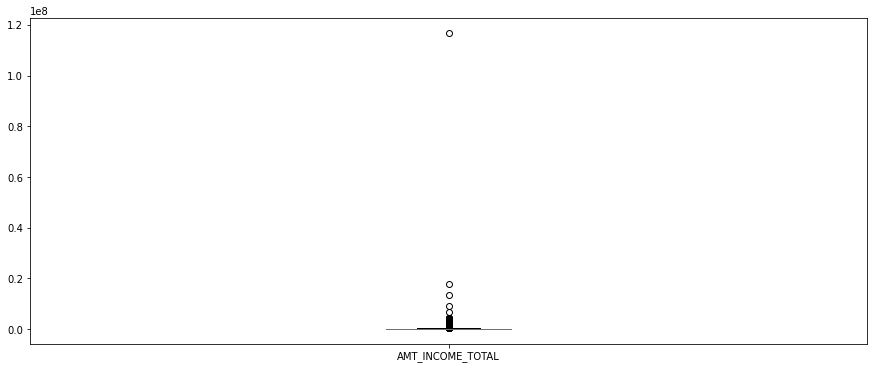

In [134]:
plt.figure(figsize=[15,6])
app_data1.AMT_INCOME_TOTAL.plot.box()
plt.show()

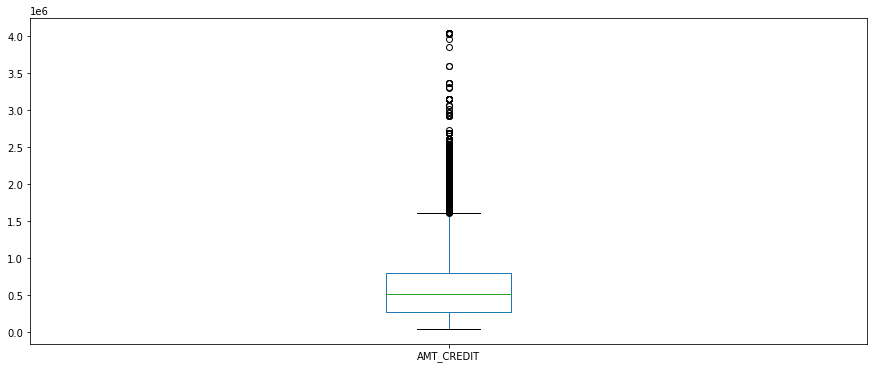

In [135]:
plt.figure(figsize=[15,6])
app_data1.AMT_CREDIT.plot.box()
plt.show()

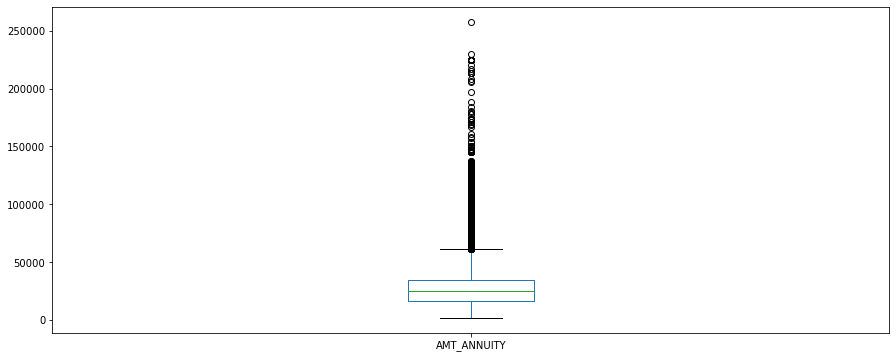

In [136]:
plt.figure(figsize=[15,6])
app_data1.AMT_ANNUITY.plot.box()
plt.show()

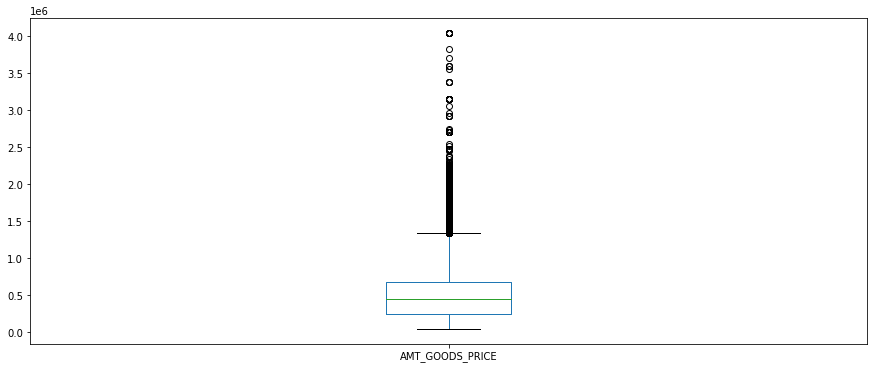

In [137]:
plt.figure(figsize=[15,6])
app_data1.AMT_GOODS_PRICE.plot.box()
plt.show()

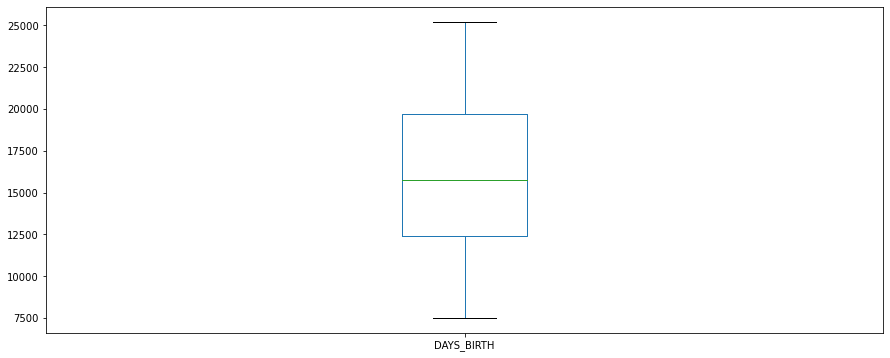

In [138]:
plt.figure(figsize=[15,6])
app_data1.DAYS_BIRTH.plot.box()
plt.show()

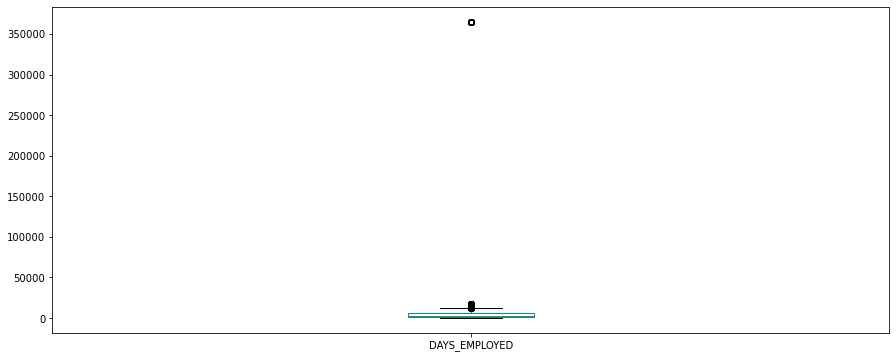

In [139]:
plt.figure(figsize=[15,6])
app_data1.DAYS_EMPLOYED.plot.box()
plt.show()

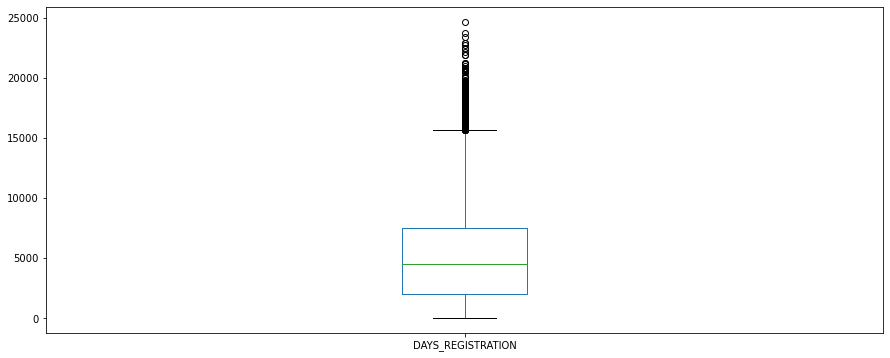

In [140]:
plt.figure(figsize=[15,6])
app_data1.DAYS_REGISTRATION.plot.box()
plt.show()

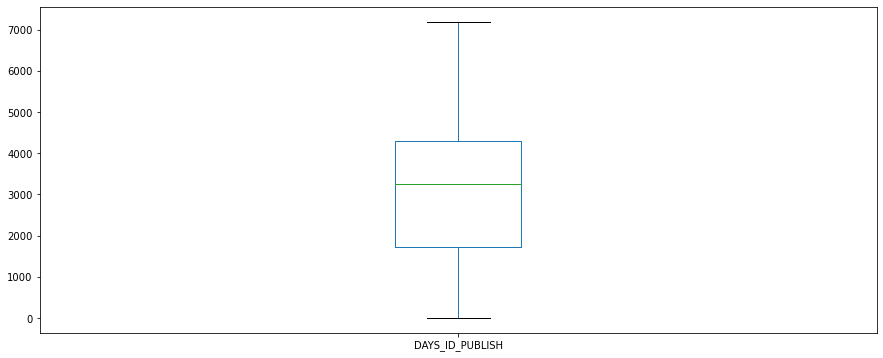

In [141]:
plt.figure(figsize=[15,6])
app_data1.DAYS_ID_PUBLISH.plot.box()
plt.show()

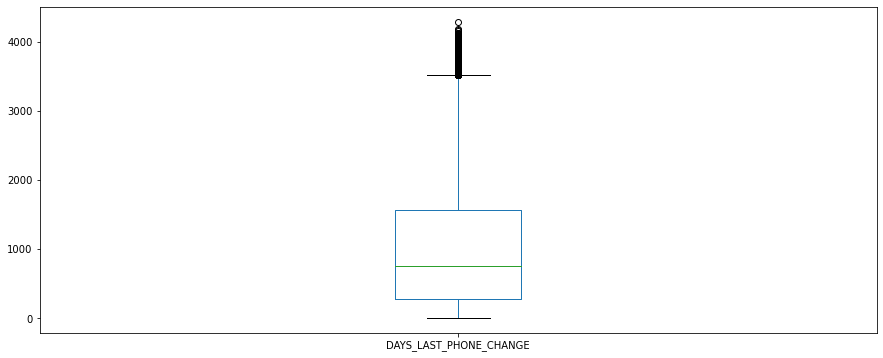

In [142]:
plt.figure(figsize=[15,6])
app_data1.DAYS_LAST_PHONE_CHANGE.plot.box()
plt.show()

### From the above plots we observe the following:

- AMT_INCOME_TOTAL - There is an outlier
- AMT_CREDIT - No outlier
- AMT_ANNUITY - There is an outlier
- AMT_GOODS_PRICE - No outlier
- DAYS_BIRTH - No outlier
- DAYS_EMPLOYED - There is an outlier
- DAYS_REGISTRATION - No outlier
- DAYS_ID_PUBLISH - No outlier
- DAYS_LAST_PHONE_CHANGE - No outlier

### Handling the Outliers

#### Dropping the data in which the "AMT_INCOME_TOTAL" is greater than "110000000"

In [143]:
app_data1 = app_data1[~(app_data1.AMT_INCOME_TOTAL>110000000)]

#### Dropping the data in which the "AMT_ANNUITY" is greater than "240000"

In [144]:
app_data1 = app_data1[~(app_data1.AMT_ANNUITY>240000)]

#### Dropping the data in which the "DAYS_EMPLOYED" is greater than "36500"

In [145]:
app_data1.DAYS_EMPLOYED[app_data1.DAYS_EMPLOYED>36500]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

#### Finding the percentage of data in "DAYS_EMPLOYED" which is greater than "36500"

In [146]:
(app_data1.DAYS_EMPLOYED[app_data1.DAYS_EMPLOYED>36500].value_counts())/len(app_data1) * 100

365243    18.007278
Name: DAYS_EMPLOYED, dtype: float64

In [147]:
# Dropping the data in which "DAYS_EMPLOYED" is greater than "36500"

app_data1 = app_data1[~(app_data1.DAYS_EMPLOYED>36500)]

### Checking the shape of the new Dataframe

In [148]:
app_data1.shape

(252135, 73)

## Creating new "Meaningful" columns from the existing data for analysis purpose

#### Inspecting if any of the columns could be "binned"

In [149]:
pd.set_option('display.max_columns', None)

In [150]:
app_data1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,1,1,1,1,0

#### Converting "DAYS_BIRTH" into "YEARS" - to bin into "AGE GROUPS"

In [151]:
# Calculating "AGE" & saving the data in a new column:

app_data1["AGE"] = round((app_data1.DAYS_BIRTH)/365)
app_data1.AGE.head(10)

0     26.0
1     46.0
2     52.0
3     52.0
4     55.0
5     46.0
6     38.0
7     52.0
9     40.0
10    28.0
Name: AGE, dtype: float64

In [152]:
# Binning the "Age" into "Age Groups"

app_data1["AGE_GROUP"] = app_data1.AGE.apply(lambda x: "Very Young" if 10<x<=20 else ("Young" if 20<x<=30 else ("Middle Age" if 30<x<=40 else ("Old" if 40<x<=60 else ("Very Old")))))
app_data1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Old
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Old
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Old
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Old


In [153]:
app_data1.AGE_GROUP.value_counts()

Old           116005
Middle Age     82241
Young          48713
Very Old        5176
Name: AGE_GROUP, dtype: int64

#### Binning "AMT_INCOME_TOTAL"

In [154]:
app_data1.AMT_INCOME_TOTAL.value_counts()

135000.0    30206
112500.0    25161
157500.0    22734
180000.0    21805
225000.0    18460
            ...  
91638.0         1
65884.5         1
107554.5        1
127102.5        1
149400.0        1
Name: AMT_INCOME_TOTAL, Length: 2265, dtype: int64

In [155]:
app_data1.AMT_INCOME_TOTAL.describe()

count    2.521350e+05
mean     1.754483e+05
std      1.134618e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [156]:
app_data1["INCOME_RANGE"] = app_data1.AMT_INCOME_TOTAL.apply(lambda x: "Very Low" if x<=25650 else("Low" if 25650<x<=112500 else("Average" if 112500<x<=157500 else("High" if 157500<x<=211500 else("Very High")))))
app_data1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Old,Very High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Old,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Old,Average
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Old,Average


In [157]:
app_data1.INCOME_RANGE.value_counts()

Low          73215
Average      68798
Very High    62694
High         47427
Very Low         1
Name: INCOME_RANGE, dtype: int64

#### Binning "REGION_POPULATION_RELATIVE"

In [158]:
app_data1.REGION_POPULATION_RELATIVE.value_counts()

0.035792    13735
0.046220    11876
0.030755     9587
0.025164     9567
0.026392     9453
            ...  
0.001417      397
0.001333      206
0.000533       24
0.000938       21
0.000290        1
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [159]:
app_data1.REGION_POPULATION_RELATIVE.describe()

count    252135.000000
mean          0.020894
std           0.013874
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [160]:
app_data1["REGION_POPULATION_CATEGORY"] = app_data1.REGION_POPULATION_RELATIVE.apply(lambda x: "Very Least Populated" if x<=0.000290 else("Least Populated" if 0.000290<x<=0.010006 else("Averagely Populated" if 0.010006<x<=0.018850 else("Highly Populated" if 0.018850<x<=0.028663 else("Very Highly Populated")))))
app_data1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,High,Averagely Populated
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Old,Very High,Least Populated


In [161]:
app_data1.REGION_POPULATION_CATEGORY.value_counts()

Highly Populated         66136
Least Populated          64632
Averagely Populated      64319
Very Highly Populated    57047
Very Least Populated         1
Name: REGION_POPULATION_CATEGORY, dtype: int64

#### Grouping "CNT_FAM_MEMBERS"

In [162]:
app_data1.CNT_FAM_MEMBERS.value_counts()

2.0     123332
3.0      51466
1.0      49049
4.0      24359
5.0       3417
6.0        396
7.0         78
8.0         19
9.0          6
10.0         3
14.0         2
20.0         2
12.0         2
16.0         1
13.0         1
11.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [163]:
app_data1.CNT_FAM_MEMBERS.describe()

count    252135.000000
mean          2.252512
std           0.942109
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [164]:
app_data1["FAMILY_SIZE"] = app_data1.CNT_FAM_MEMBERS.apply(lambda x: "Very Small" if x<=1 else("Small" if 1<x<=3 else("Medium" if 3<x<=5 else("Large" if 5<x<=8 else("Very Large")))))
app_data1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Young,High,Averagely Populated,Very Small
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Old,Very High,Least Populated,Small


In [165]:
app_data1.FAMILY_SIZE.value_counts()

Small         174798
Very Small     49049
Medium         27776
Large            493
Very Large        19
Name: FAMILY_SIZE, dtype: int64

### Dropping "UNWANTED" columns from the Dataframe

In [166]:
app_data2 = app_data1.copy()

In [167]:
app_data2.shape

(252135, 78)

In [168]:
app_data2.drop(['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 
                'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 
                'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
                'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
                'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 
                'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
                'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'], inplace=True, axis=1)
app_data2.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637,Laborers,2,2,Business Entity Type 3,1134.0,Young,High,Averagely Populated,Very Small
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188,Core staff,1,1,School,828.0,Old,Very High,Least Populated,Small


In [169]:
app_data2.shape

(252135, 26)

## Checking Data Imbalance

#### Checking the definition of TARGET

In [170]:
print(list(col_des.Description[col_des.Row.isin(["TARGET"])]))

['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']


In [171]:
app_data1.TARGET.value_counts()

0    230301
1     21834
Name: TARGET, dtype: int64

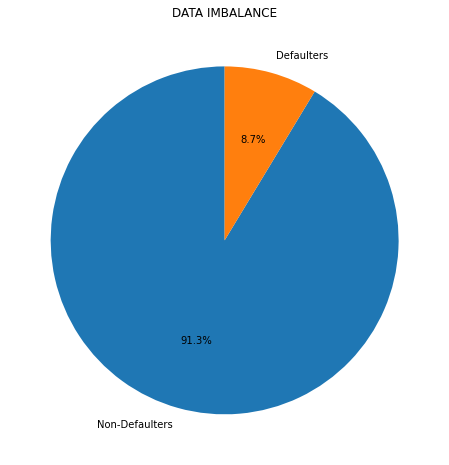

In [172]:
plt.figure(figsize=[16,8])
app_data1.TARGET.value_counts().plot.pie(title="DATA IMBALANCE", labels=["Non-Defaulters", "Defaulters"],
                                         startangle=90, autopct='%1.1f%%', ylabel='')
plt.show()

#### From the above graph, it is clear that there is a huge data imbalance between Defaulters & Non-Defaulters.

## UNIVARIATE ANALYSIS

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON GENDER

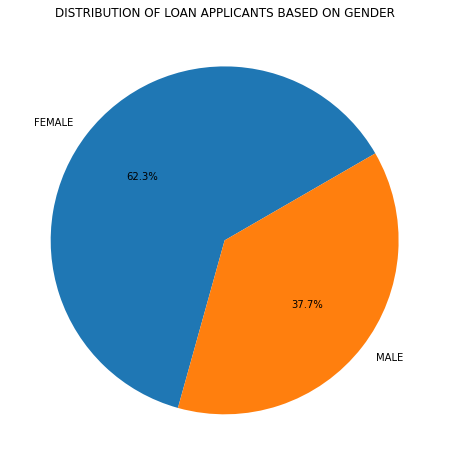

In [173]:
plt.figure(figsize=[16,8])
app_data2.CODE_GENDER.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON GENDER", labels=["FEMALE", "MALE"], 
                                              startangle=30, autopct='%1.1f%%', ylabel='')
plt.show()

#### From the above plot, it is clear that Female applicants are more than the Male applicants

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON OWNING A CAR

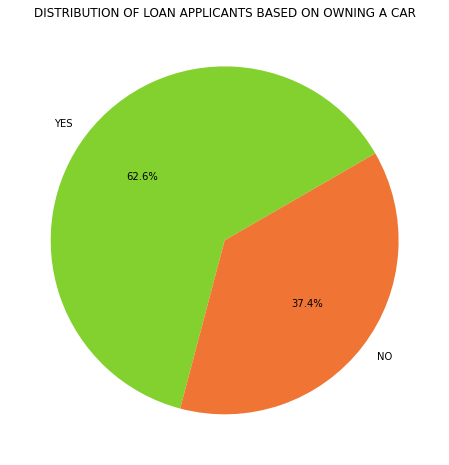

In [174]:
plt.figure(figsize=[16,8])
app_data2.FLAG_OWN_CAR.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON OWNING A CAR", 
                                               labels=["YES", "NO"], colors=("#83D12F", "#F07534"), startangle=30, 
                                               autopct='%1.1f%%', ylabel='')
plt.show()

#### From the above graph, it is clear that the people owning a Car have applied for loans more than the people not owning a car.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON OWNING A HOUSING PROPERTY

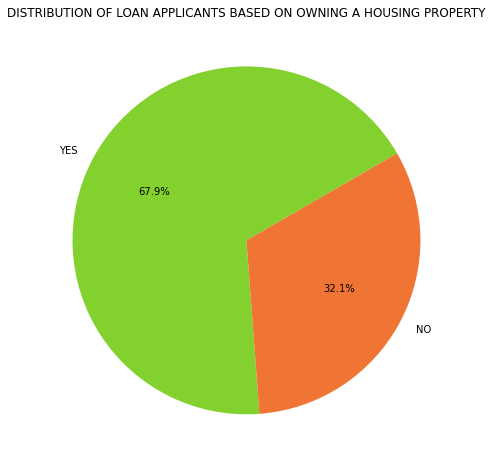

In [175]:
plt.figure(figsize=[16,8])
app_data2.FLAG_OWN_REALTY.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON OWNING A HOUSING PROPERTY", 
                                                  labels=["YES", "NO"], colors=("#83D12F", "#F07534"), startangle=30, 
                                                  autopct='%1.1f%%', ylabel='')
plt.show()

#### From the above graph, it is clear that the people owning a realty have applied for loans more than the people not owning a realty.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON SOURCE OF INCOME

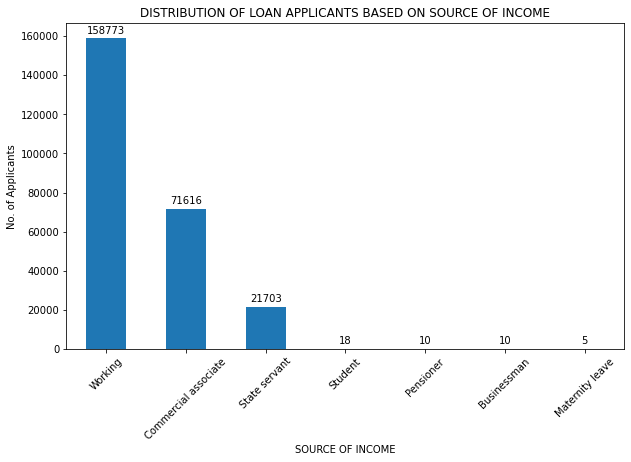

In [176]:
plt.figure(figsize=[10,6])
splot = app_data2.NAME_INCOME_TYPE.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON SOURCE OF INCOME", 
                                                   width=0.5)
splot.set_xlabel("SOURCE OF INCOME")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),#text that you want to write on top
                   (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                   ha = 'center', va = 'center',# alignment of the text
                   xytext = (0, 8),# distance of text from top of the patch
                   textcoords = 'offset points') #do not change and remove it
plt.show()

#### From the above graph, it is clear that the loan applications are higher from people whose source of income is by working.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON EDUCATION

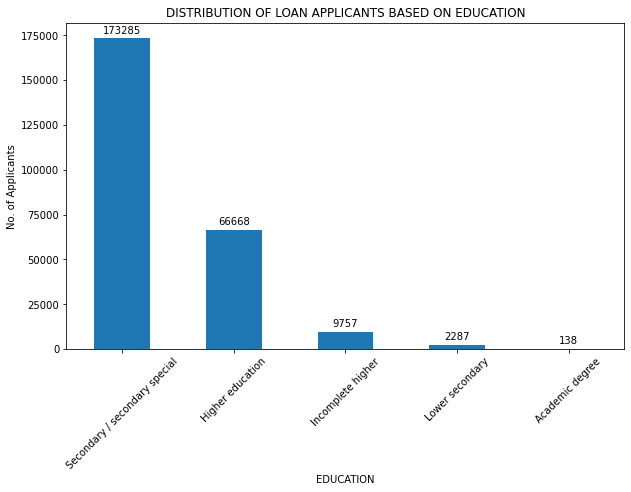

In [177]:
plt.figure(figsize=[10,6])
splot = app_data2.NAME_EDUCATION_TYPE.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON EDUCATION")
splot.set_xlabel("EDUCATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),#text that you want to write on top
                   (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                   ha = 'center', va = 'center',# alignment of the text
                   xytext = (0, 8),# distance of text from top of the patch
                   textcoords = 'offset points') #do not change and remove it
plt.show()

#### From the above graph, it is clear that the people who have completed Secondary education have applied for loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON MARITAL STATUS

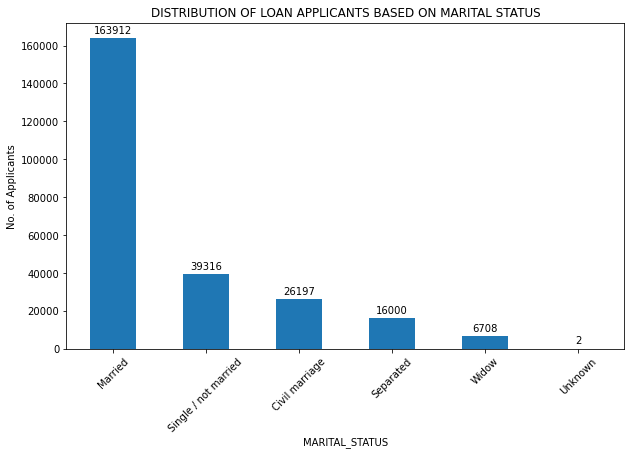

In [178]:
plt.figure(figsize=[10,6])
splot = app_data2.NAME_FAMILY_STATUS.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON MARITAL STATUS")
splot.set_xlabel("MARITAL_STATUS")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha="center", va="center",
                   xytext=[0,8],
                   textcoords="offset points")
plt.show()

#### From the above graph, it is clear that the Married people have applied loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON HOUSING TYPE

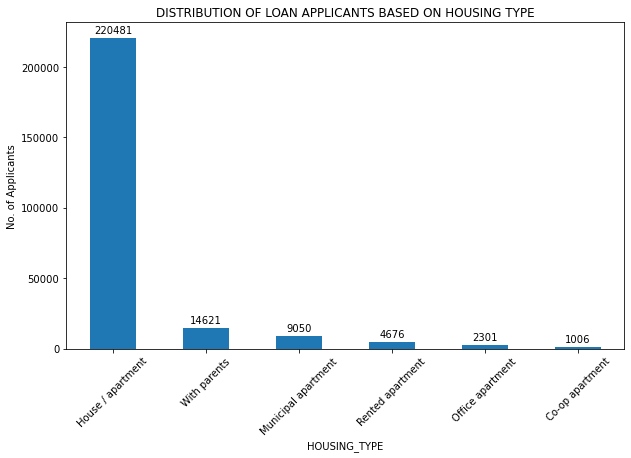

In [179]:
plt.figure(figsize=[10,6])
splot = app_data2.NAME_HOUSING_TYPE.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON HOUSING TYPE")
splot.set_xlabel("HOUSING_TYPE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha="center", va="center",
                   xytext=[0,8],
                   textcoords="offset points")
plt.show()

#### From the above graph, it is clear that the people in House/apartment have applied loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON OCCUPATION

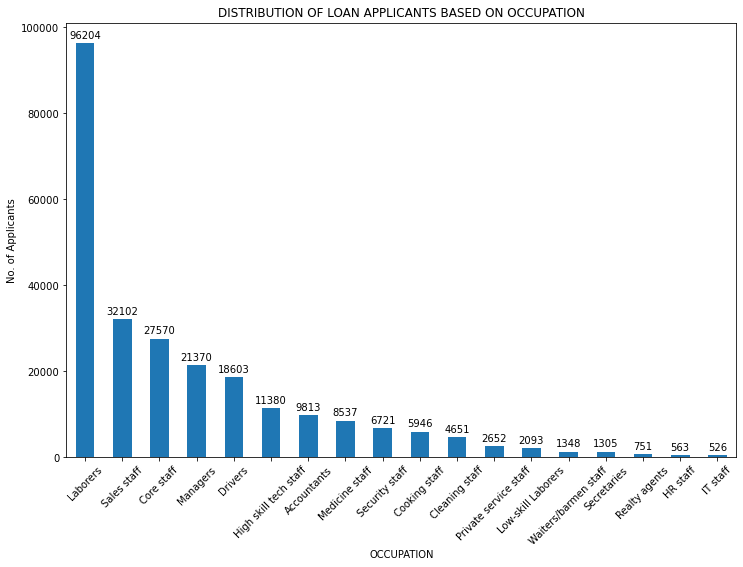

In [180]:
plt.figure(figsize=[12,8])
splot = app_data2.OCCUPATION_TYPE.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON OCCUPATION", 
                                                          xlabel="OCCUPATION", ylabel="No. of Applicants")
splot.set_xlabel("OCCUPATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha="center", va="center",
                   xytext=[0,8],
                   textcoords="offset points")
plt.show()

#### From the above graph, it is clear that the Laborers have applied loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON ORGANIZATON_TYPE

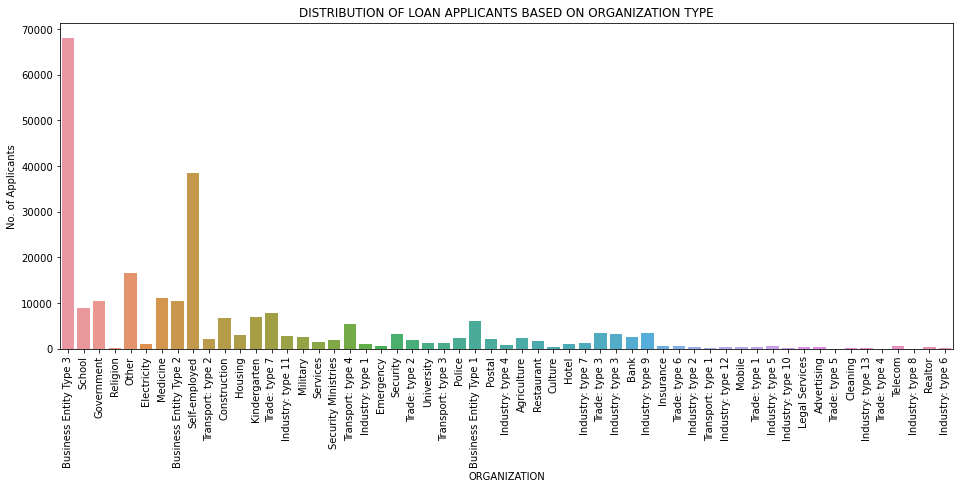

In [181]:
plt.figure(figsize=[16,6])
sns.countplot(app_data2["ORGANIZATION_TYPE"]).set_title("DISTRIBUTION OF LOAN APPLICANTS BASED ON ORGANIZATION TYPE")
plt.xticks(rotation=90)
plt.xlabel("ORGANIZATION")
plt.ylabel("No. of Applicants")
plt.show()

#### From the above graph, it is clear that the people working in Business Entity Type 3 have applied loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON AGE_GROUP

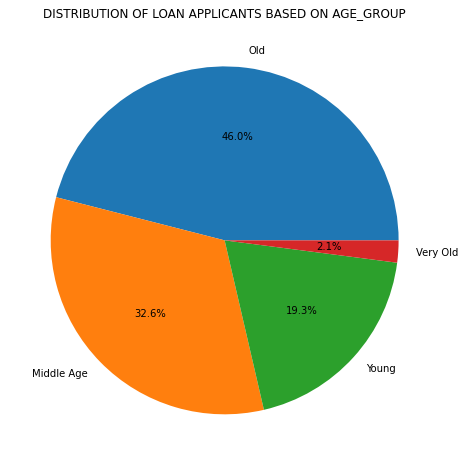

In [182]:
plt.figure(figsize=[12,8])
app_data2.AGE_GROUP.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON AGE_GROUP", 
                                            ylabel='', autopct='%1.1f%%')
plt.show()

#### From the above graph, it is clear that the old age people have applied loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON INCOME

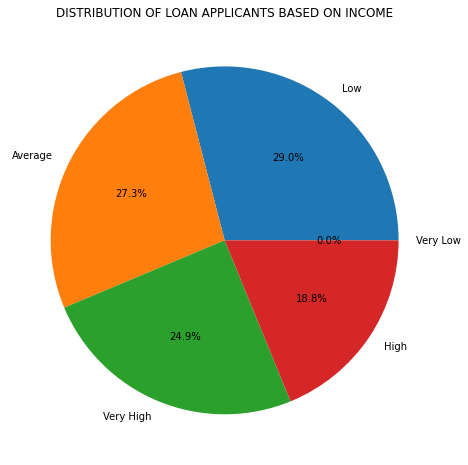

In [183]:
plt.figure(figsize=[12,8])
app_data2.INCOME_RANGE.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON INCOME", 
                                               ylabel='', autopct='%1.1f%%')
plt.show()

#### From the above graph, it is clear that the loan applicants are equally distributed in all income range.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON REGIONAL POPULATION

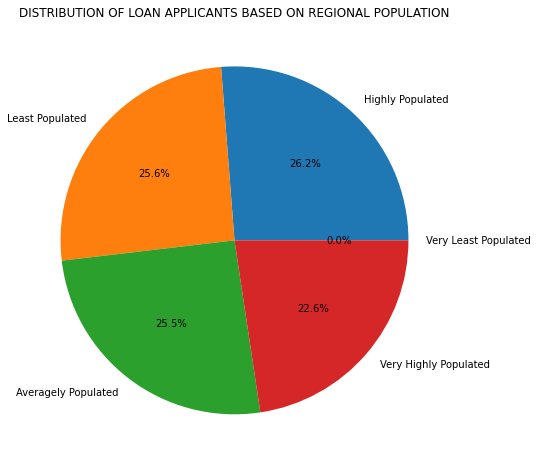

In [184]:
plt.figure(figsize=[12,8])
app_data2.REGION_POPULATION_CATEGORY.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON REGIONAL POPULATION",
                                                             ylabel='', autopct='%1.1f%%')
plt.show()

#### From the above graph, it is clear that the loan applicants are equally distributed population-wise.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON FAMILY SIZE

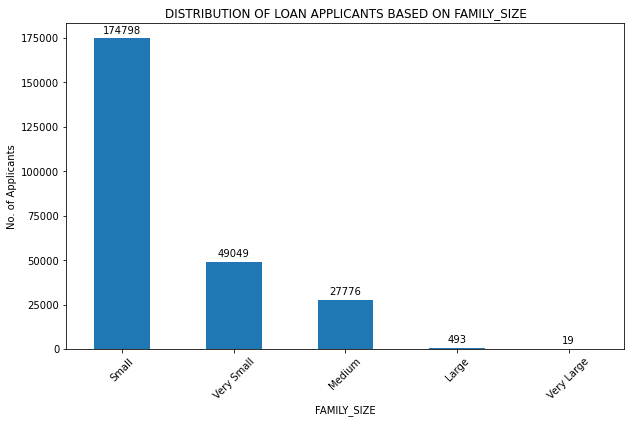

In [185]:
plt.figure(figsize=[10,6])
splot = app_data2.FAMILY_SIZE.value_counts().plot.bar(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON FAMILY_SIZE",
                                              xlabel="Family Size", ylabel="No. of Applicants")
splot.set_xlabel("FAMILY_SIZE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(p.get_height(),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")
plt.show()

#### From the above graph, it is clear that the people with small family size have applied for loans more than any other category.

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE

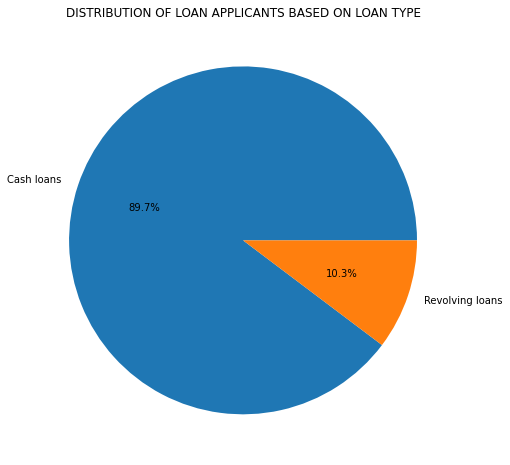

In [186]:
plt.figure(figsize=[12,8])
app_data2.NAME_CONTRACT_TYPE.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE",
                                                     ylabel='', autopct='%1.1f%%')
plt.show()

#### From the above graph, it is clear that the cash loan applications are more than the revolving loan applications.

## Segmented Univariate Analysis
- To conduct the analysis of different factors in the defaulters and non-defaulters data (i.e., TARGET 1 and 0)

### Creating two datasets based on "TARGET" value

In [187]:
t0 = app_data2.loc[app_data2.TARGET==0]
t1 = app_data2.loc[app_data2.TARGET==1]

In [188]:
t0.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188,Core staff,1,1,School,828.0,Old,Very High,Least Populated,Small
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,225,Laborers,2,2,Government,815.0,Old,Low,Averagely Populated,Very Small


In [189]:
t1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637,Laborers,2,2,Business Entity Type 3,1134.0,Young,High,Averagely Populated,Very Small
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,2628,Cooking staff,3,2,Business Entity Type 3,161.0,Old,Low,Averagely Populated,Very Small


#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON GENDER

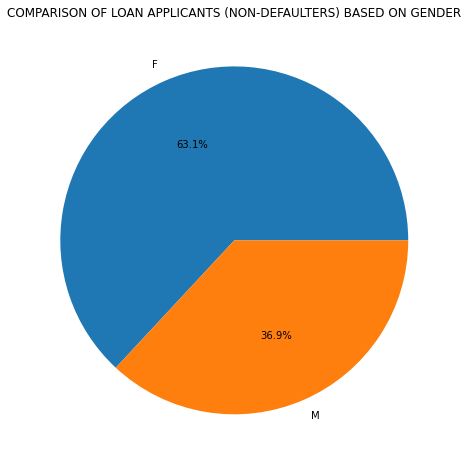

In [190]:
x = t0.CODE_GENDER.value_counts()
y = t1.CODE_GENDER.value_counts()

plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON GENDER",
           ylabel='', autopct='%1.1f%%')

plt.show()

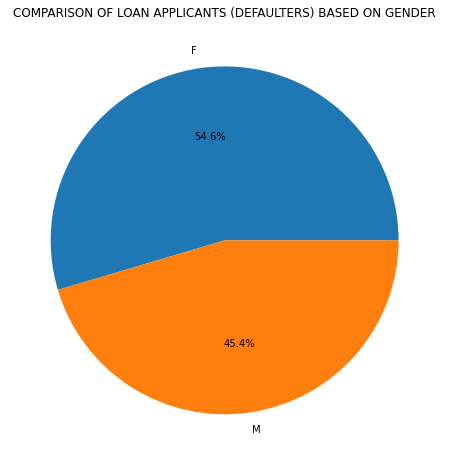

In [191]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON GENDER",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON LOAN TYPE

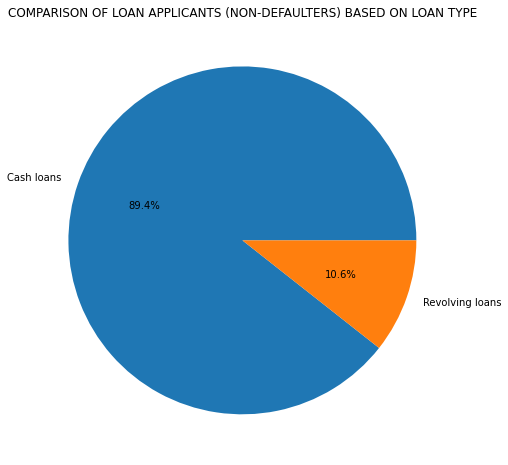

In [192]:
x = t0.NAME_CONTRACT_TYPE.value_counts()
y = t1.NAME_CONTRACT_TYPE.value_counts()

plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON LOAN TYPE",
           ylabel='', autopct='%1.1f%%')

plt.show()

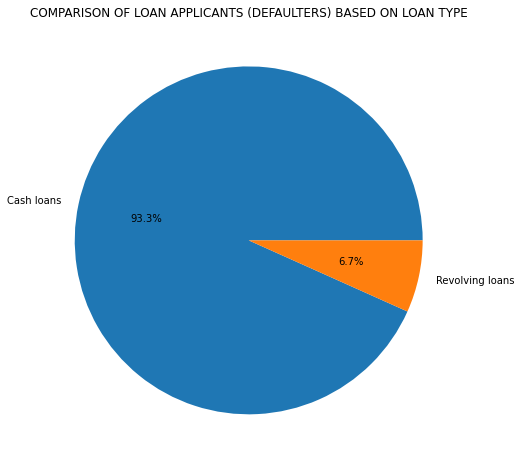

In [193]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON LOAN TYPE",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OWNING A CAR

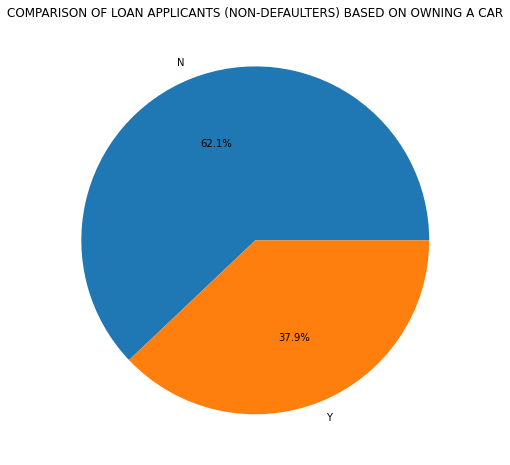

In [194]:
x = t0.FLAG_OWN_CAR.value_counts()
y = t1.FLAG_OWN_CAR.value_counts()

plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OWNING A CAR",
           ylabel='', autopct='%1.1f%%')

plt.show()

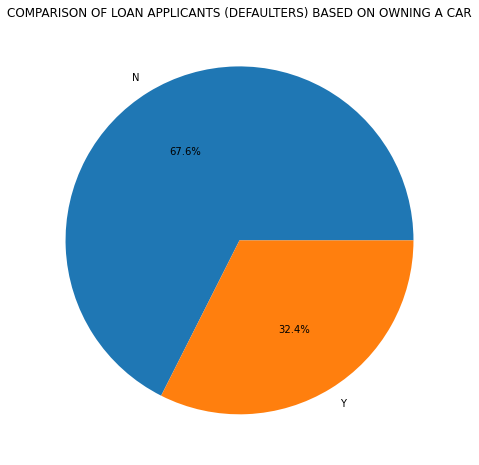

In [195]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OWNING A CAR",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OWNING A REALTY

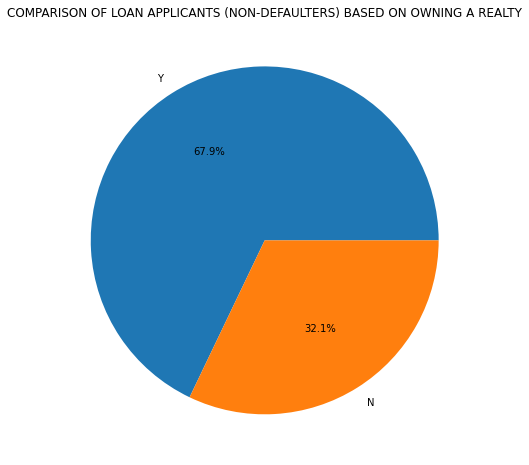

In [196]:
x = t0.FLAG_OWN_REALTY.value_counts()
y = t1.FLAG_OWN_REALTY.value_counts()

plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OWNING A REALTY",
           ylabel='', autopct='%1.1f%%')

plt.show()

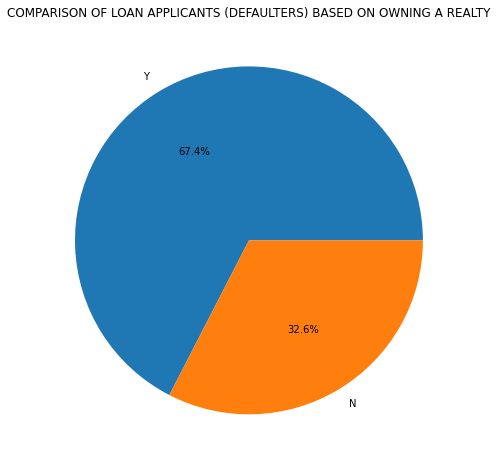

In [197]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OWNING A REALTY", 
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON SUITE TYPE

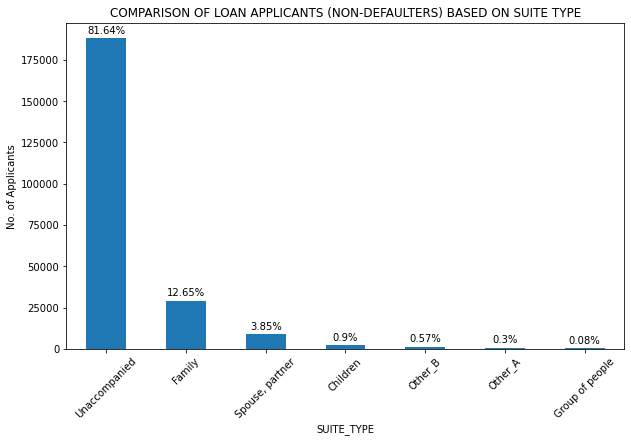

In [198]:
x = t0.NAME_TYPE_SUITE.value_counts()
y = t1.NAME_TYPE_SUITE.value_counts()

plt.figure(figsize=[10,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON SUITE TYPE")
splot.set_xlabel("SUITE_TYPE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

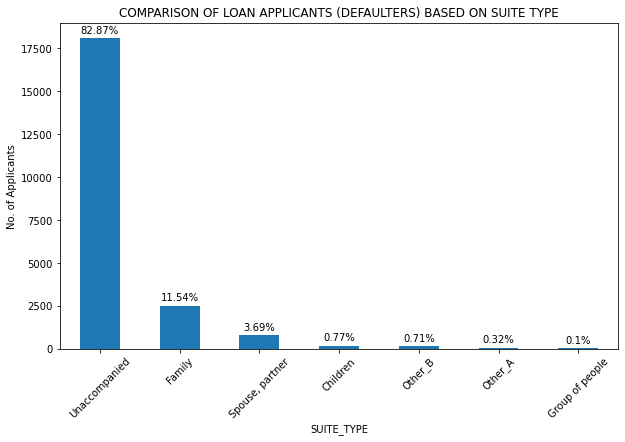

In [199]:
plt.figure(figsize=[10,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON SUITE TYPE")
splot.set_xlabel("SUITE_TYPE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON AGE GROUP

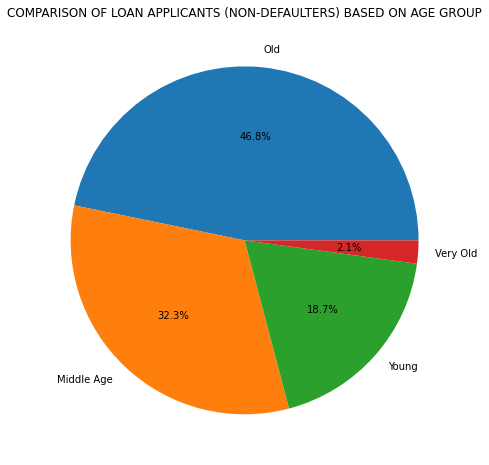

In [200]:
x = t0.AGE_GROUP.value_counts()
y = t1.AGE_GROUP.value_counts()

plt.figure(figsize=[12,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON AGE GROUP",
           ylabel='', autopct='%1.1f%%')

plt.show()

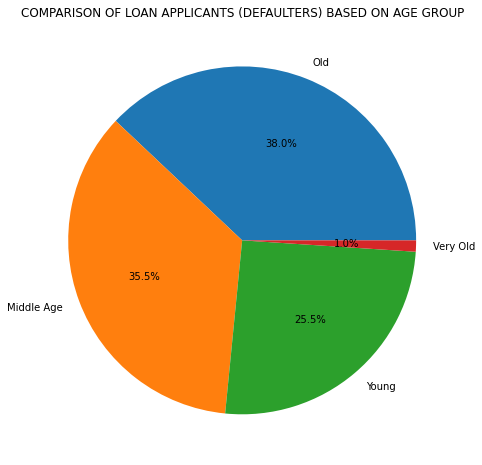

In [201]:
plt.figure(figsize=[12,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON AGE GROUP",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON INCOME RANGE

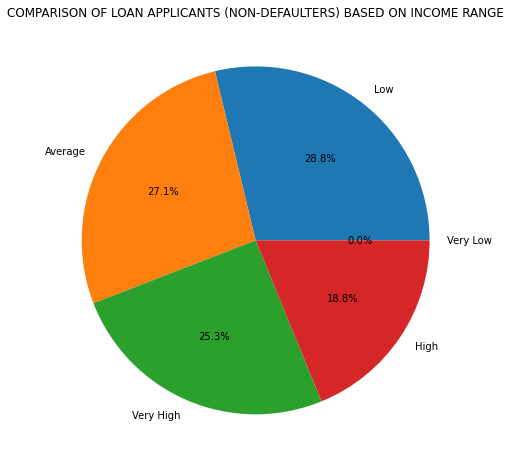

In [202]:
x = t0.INCOME_RANGE.value_counts()
y = t1.INCOME_RANGE.value_counts()

plt.figure(figsize=[12,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON INCOME RANGE",
           ylabel='', autopct='%1.1f%%')

plt.show()

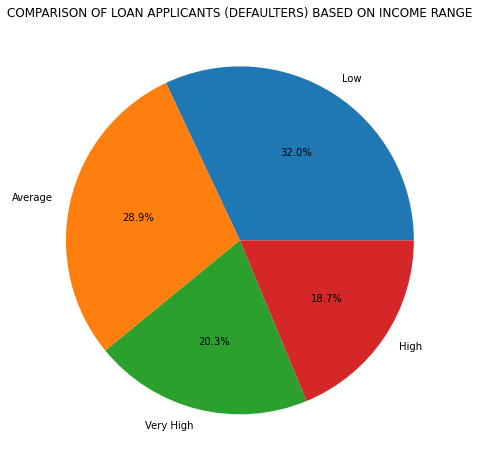

In [203]:
plt.figure(figsize=[12,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON INCOME RANGE",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON INCOME TYPE

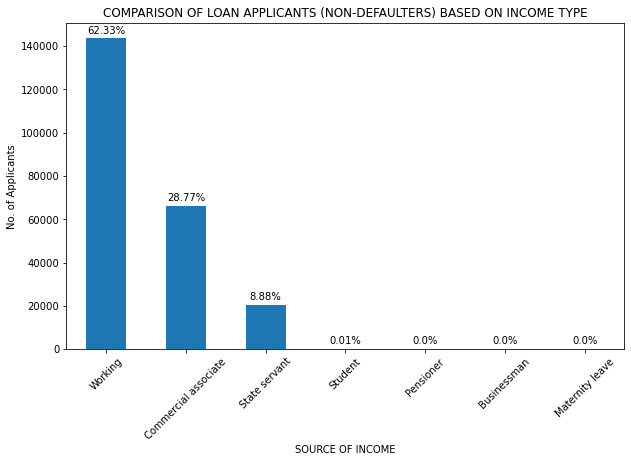

In [204]:
x = t0.NAME_INCOME_TYPE.value_counts()
y = t1.NAME_INCOME_TYPE.value_counts()

plt.figure(figsize=[10,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON INCOME TYPE")
splot.set_xlabel("SOURCE OF INCOME")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

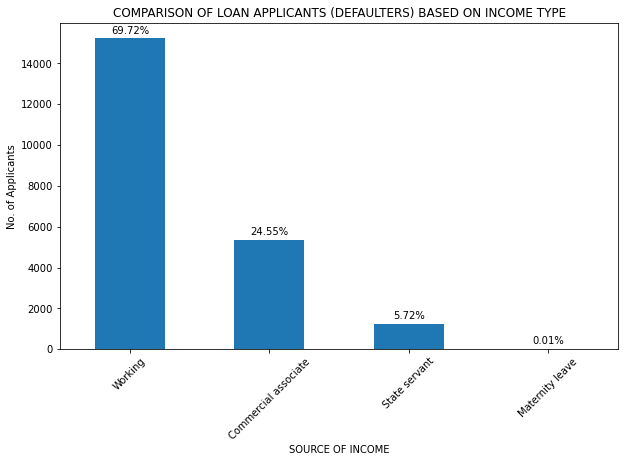

In [205]:
plt.figure(figsize=[10,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON INCOME TYPE")
splot.set_xlabel("SOURCE OF INCOME")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

In [206]:
app_data2.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637,Laborers,2,2,Business Entity Type 3,1134.0,Young,High,Averagely Populated,Very Small
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188,Core staff,1,1,School,828.0,Old,Very High,Least Populated,Small


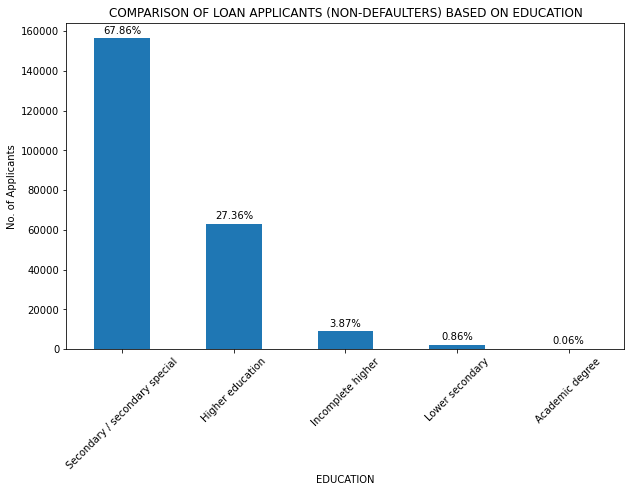

In [207]:
x = t0.NAME_EDUCATION_TYPE.value_counts()
y = t1.NAME_EDUCATION_TYPE.value_counts()

plt.figure(figsize=[10,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON EDUCATION")
splot.set_xlabel("EDUCATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

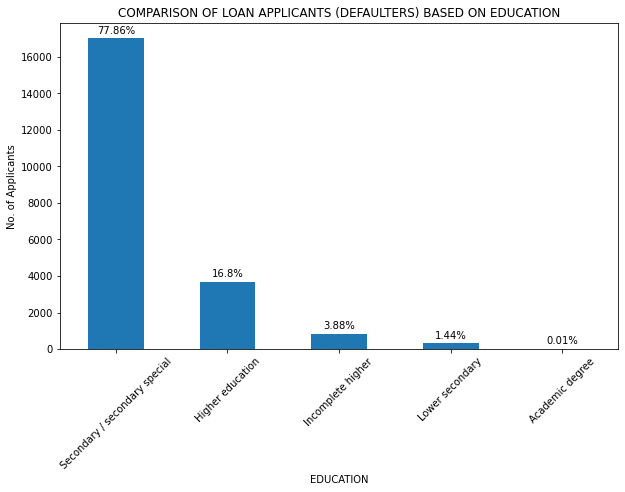

In [208]:
plt.figure(figsize=[10,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON EDUCATION")
splot.set_xlabel("EDUCATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON MARITAL STATUS

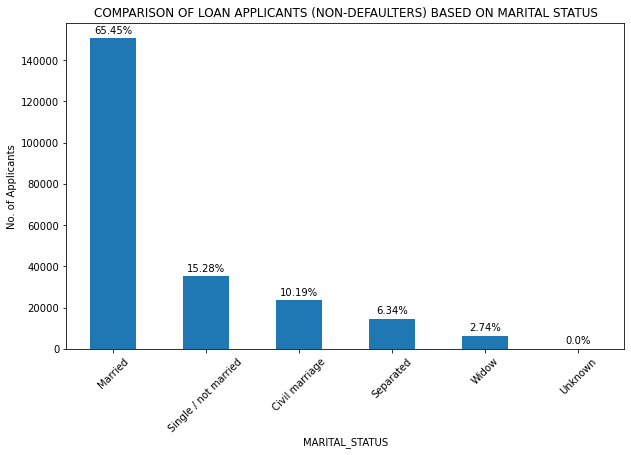

In [209]:
x = t0.NAME_FAMILY_STATUS.value_counts()
y = t1.NAME_FAMILY_STATUS.value_counts()

plt.figure(figsize=[10,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON MARITAL STATUS")
splot.set_xlabel("MARITAL_STATUS")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

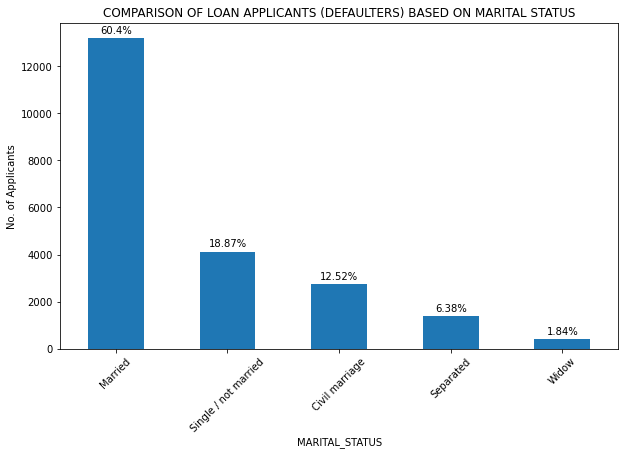

In [210]:
plt.figure(figsize=[10,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON MARITAL STATUS")
splot.set_xlabel("MARITAL_STATUS")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON HOUSING TYPE

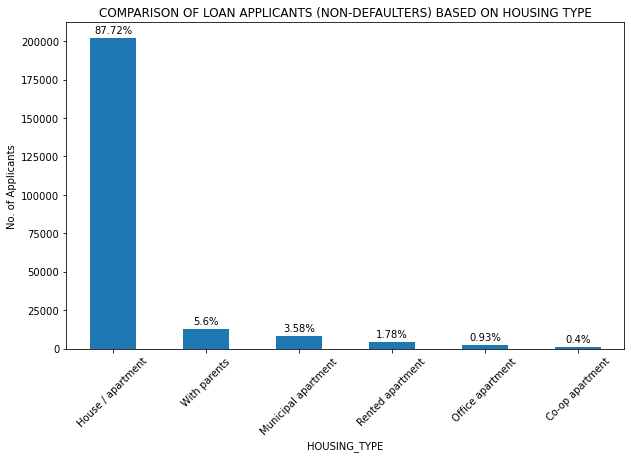

In [211]:
x = t0.NAME_HOUSING_TYPE.value_counts()
y = t1.NAME_HOUSING_TYPE.value_counts()

plt.figure(figsize=[10,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON HOUSING TYPE")
splot.set_xlabel("HOUSING_TYPE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

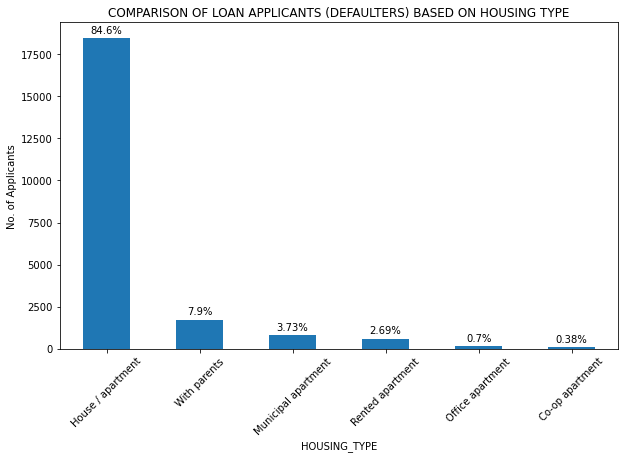

In [212]:
plt.figure(figsize=[10,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON HOUSING TYPE")
splot.set_xlabel("HOUSING_TYPE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OCCUPATION

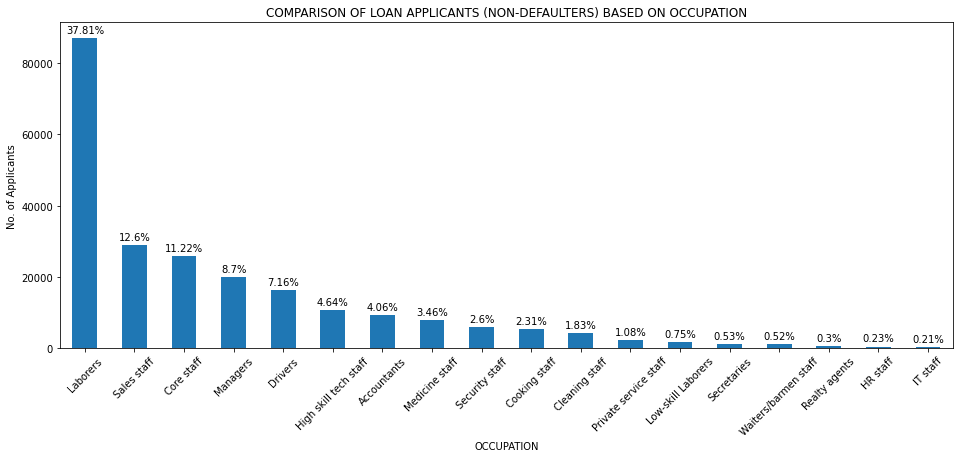

In [213]:
x = t0.OCCUPATION_TYPE.value_counts()
y = t1.OCCUPATION_TYPE.value_counts()

plt.figure(figsize=[16,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OCCUPATION")
splot.set_xlabel("OCCUPATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

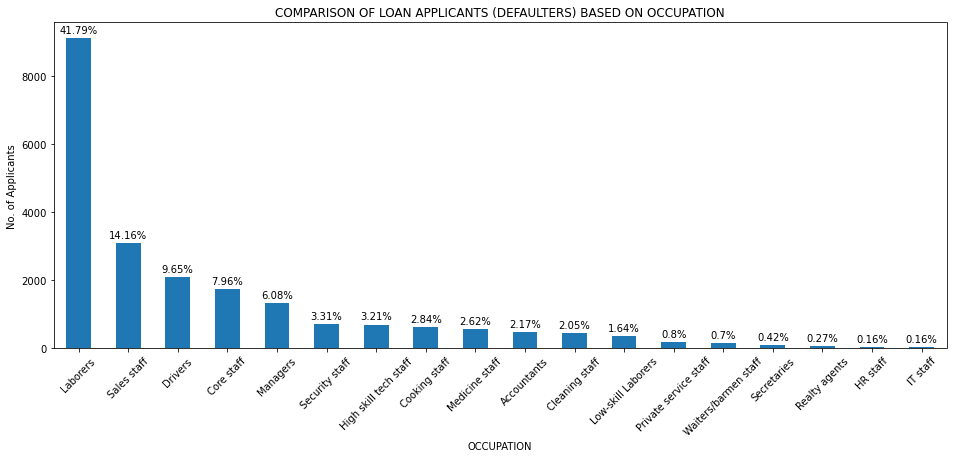

In [214]:
plt.figure(figsize=[16,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OCCUPATION")
splot.set_xlabel("OCCUPATION")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON REGION RATING

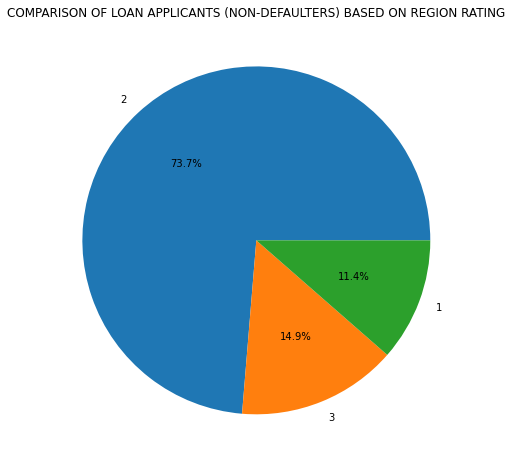

In [215]:
x = t0.REGION_RATING_CLIENT.value_counts()
y = t1.REGION_RATING_CLIENT.value_counts()

plt.figure(figsize=[12,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON REGION RATING",
           ylabel='', autopct='%1.1f%%')

plt.show()

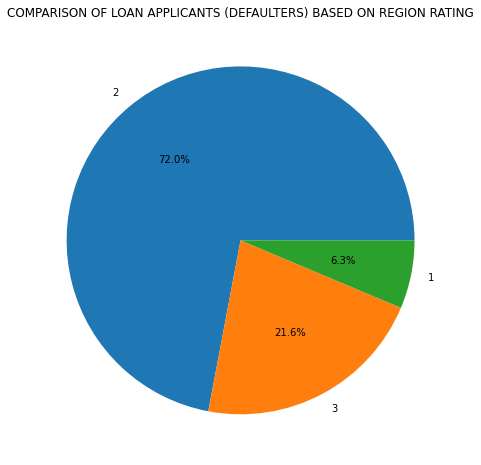

In [216]:
plt.figure(figsize=[12,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON REGION RATING",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON ORGANIZATION

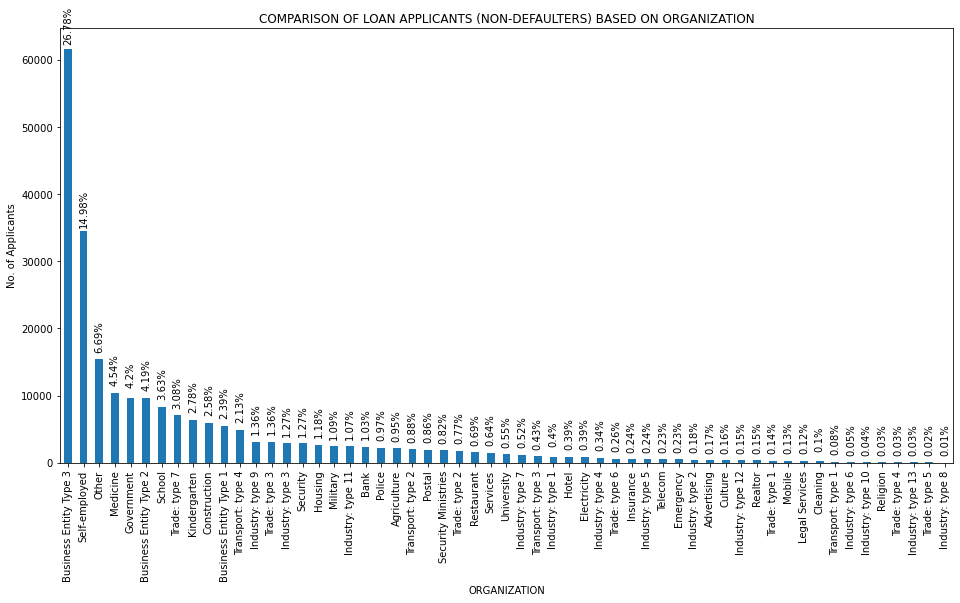

In [217]:
x = t0.ORGANIZATION_TYPE.value_counts()
y = t1.ORGANIZATION_TYPE.value_counts()

plt.figure(figsize=[16,8])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON ORGANIZATION")
splot.set_xlabel("ORGANIZATION")
plt.xticks(rotation=90)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', rotation=90,
                   xytext=[0,23],
                   textcoords="offset points")

plt.show()

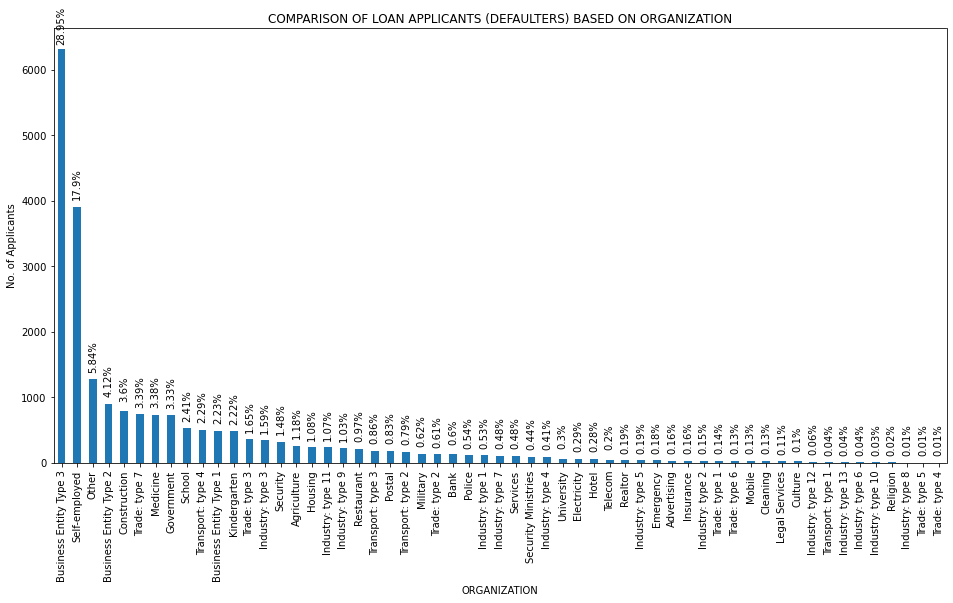

In [218]:
plt.figure(figsize=[16,8])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON ORGANIZATION")
splot.set_xlabel("ORGANIZATION")
plt.xticks(rotation=90)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', rotation=90,
                   xytext=[0,23],
                   textcoords="offset points")

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON REGIONAL POPULATION

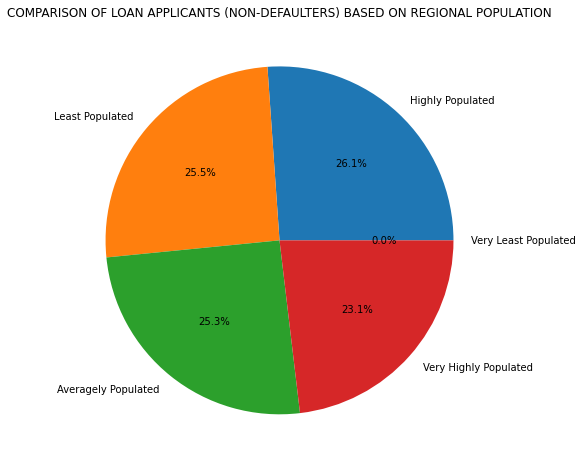

In [219]:
x = t0.REGION_POPULATION_CATEGORY.value_counts()
y = t1.REGION_POPULATION_CATEGORY.value_counts()

plt.figure(figsize=[12,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON REGIONAL POPULATION",
           ylabel='', autopct='%1.1f%%')

plt.show()

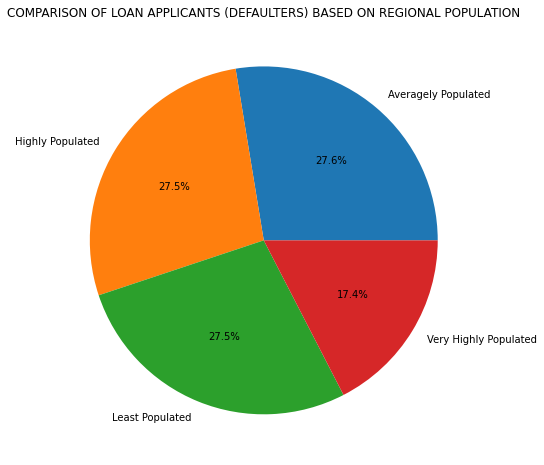

In [220]:
plt.figure(figsize=[12,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON REGIONAL POPULATION",
           ylabel='', autopct='%1.1f%%')

plt.show()

#### COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON FAMILY SIZE

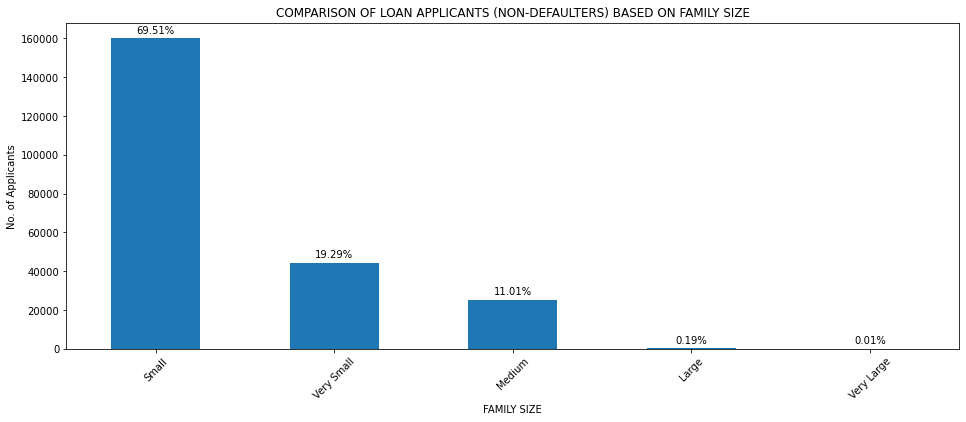

In [221]:
x = t0.FAMILY_SIZE.value_counts()
y = t1.FAMILY_SIZE.value_counts()

plt.figure(figsize=[16,6])
splot = x.plot.bar(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON FAMILY SIZE")
splot.set_xlabel("FAMILY SIZE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/x.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

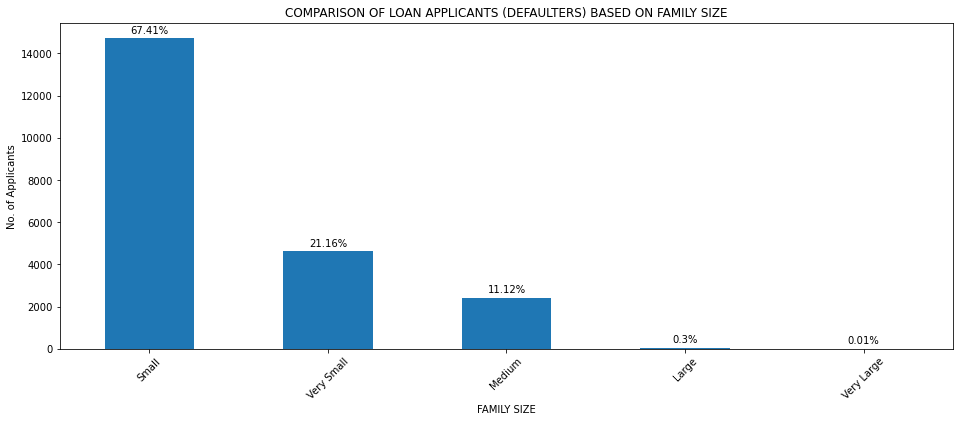

In [222]:
plt.figure(figsize=[16,6])
splot = y.plot.bar(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON FAMILY SIZE")
splot.set_xlabel("FAMILY SIZE")
plt.xticks(rotation=45)
splot.set_ylabel("No. of Applicants")
for p in splot.patches:
    splot.annotate(f'{str(round((p.get_height()/y.sum())*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,8],
                   textcoords="offset points")

plt.show()

## Bi-VARIATE ANALYSIS

### CATEGORICAL vs CATEGORICAL ANALYSIS

#### DEFAULTERS & NON-DEFAULTERS BASED ON LOAN TYPE

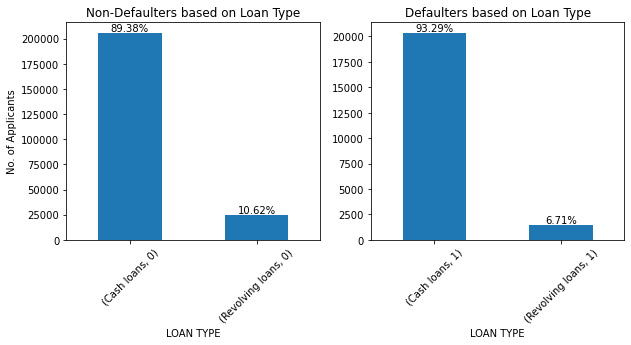

In [223]:
x_sum = t0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Loan Type")
splot1.set_xlabel("LOAN TYPE")
plt.xticks(rotation=45)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_CONTRACT_TYPE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Loan Type")
splot2.set_xlabel("LOAN TYPE")
plt.xticks(rotation=45)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON SUITE TYPE

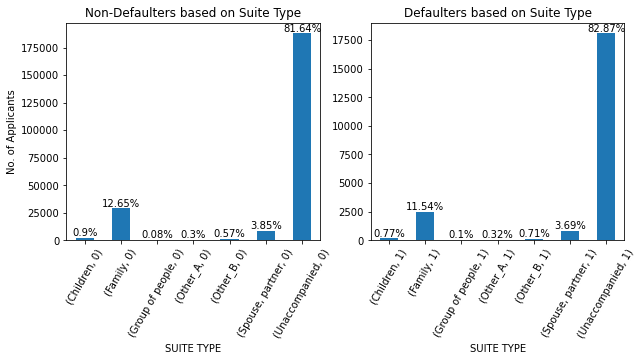

In [224]:
x_sum = t0.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Suite Type")
splot1.set_xlabel("SUITE TYPE")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_TYPE_SUITE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Suite Type")
splot2.set_xlabel("SUITE TYPE")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON SOURCE OF INCOME

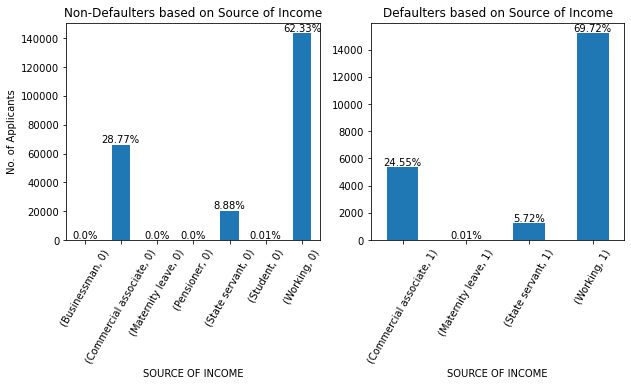

In [225]:
x_sum = t0.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Source of Income")
splot1.set_xlabel("SOURCE OF INCOME")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_INCOME_TYPE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Source of Income")
splot2.set_xlabel("SOURCE OF INCOME")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON EDUCATION

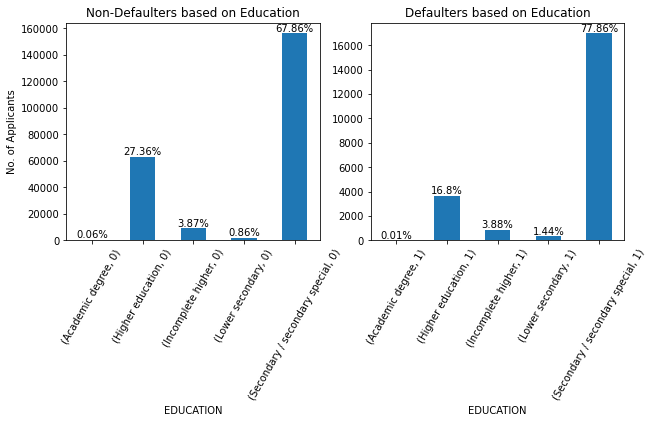

In [226]:
x_sum = t0.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Education")
splot1.set_xlabel("EDUCATION")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_EDUCATION_TYPE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Education")
splot2.set_xlabel("EDUCATION")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON MARITAL STATUS

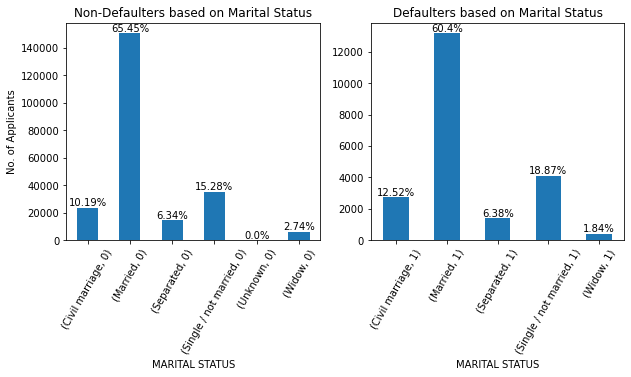

In [227]:
x_sum = t0.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Marital Status")
splot1.set_xlabel("MARITAL STATUS")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_FAMILY_STATUS"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Marital Status")
splot2.set_xlabel("MARITAL STATUS")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON HOUSING TYPE

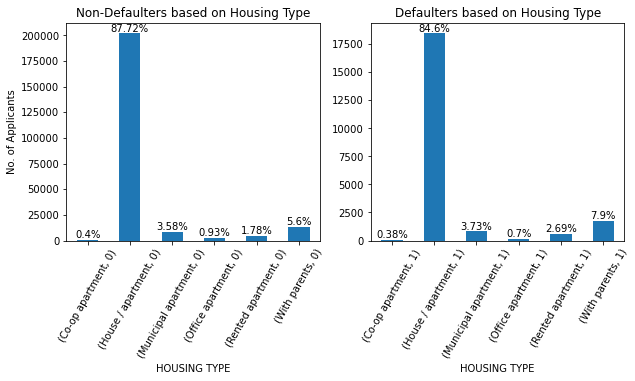

In [228]:
x_sum = t0.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Housing Type")
splot1.set_xlabel("HOUSING TYPE")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["NAME_HOUSING_TYPE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Housing Type")
splot2.set_xlabel("HOUSING TYPE")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON AGE GROUP

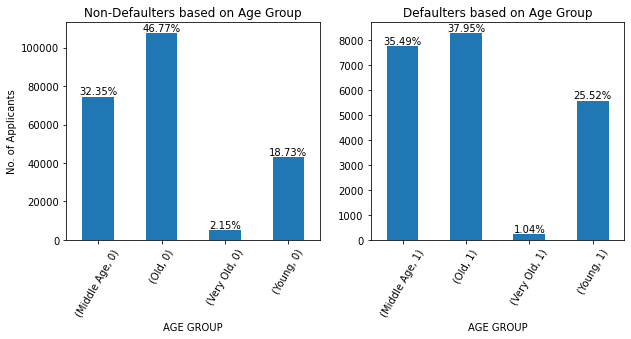

In [229]:
x_sum = t0.groupby(['AGE_GROUP'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['AGE_GROUP'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['AGE_GROUP'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Age Group")
splot1.set_xlabel("AGE GROUP")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["AGE_GROUP"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Age Group")
splot2.set_xlabel("AGE GROUP")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON INCOME RANGE

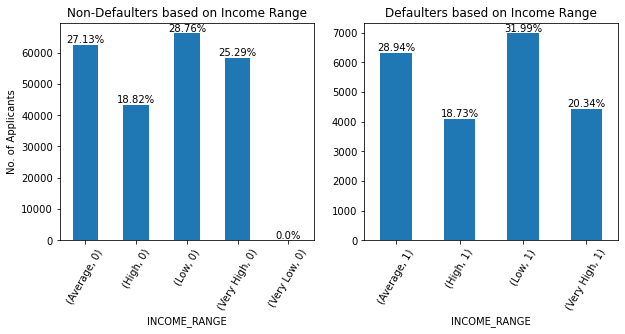

In [230]:
x_sum = t0.groupby(['INCOME_RANGE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['INCOME_RANGE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['INCOME_RANGE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Income Range")
splot1.set_xlabel("INCOME_RANGE")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["INCOME_RANGE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Income Range")
splot2.set_xlabel("INCOME_RANGE")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON REGIONAL POPULATION

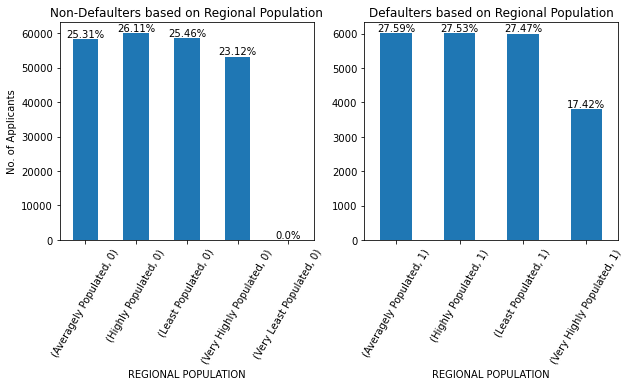

In [231]:
x_sum = t0.groupby(['REGION_POPULATION_CATEGORY'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['REGION_POPULATION_CATEGORY'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['REGION_POPULATION_CATEGORY'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Regional Population")
splot1.set_xlabel("REGIONAL POPULATION")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["REGION_POPULATION_CATEGORY"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Regional Population")
splot2.set_xlabel("REGIONAL POPULATION")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON FAMILY SIZE

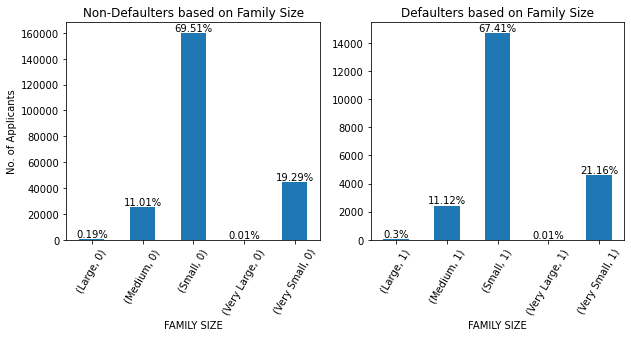

In [232]:
x_sum = t0.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Family Size")
splot1.set_xlabel("FAMILY SIZE")
plt.xticks(rotation=60)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["FAMILY_SIZE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Family Size")
splot2.set_xlabel("FAMILY SIZE")
plt.xticks(rotation=60)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")
plt.show()

#### DEFAULTERS & NON-DEFAULTERS BASED ON OCCUPATION TYPE

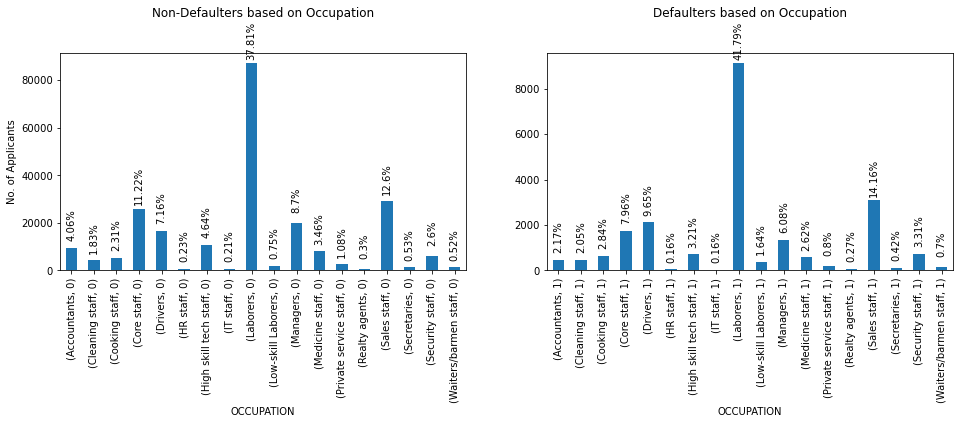

In [233]:
x_sum = t0.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().sum()
y_sum = t1.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().sum()

plt.figure(figsize=[16,4])
plt.subplot(1,2,1)
splot1 = t0.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().plot.bar(title="Non-Defaulters based on Occupation\n\n")
splot1.set_xlabel("OCCUPATION")
plt.xticks(rotation=90)
splot1.set_ylabel("No. of Applicants")
for p in splot1.patches:
    splot1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,23], rotation=90,
                   textcoords="offset points")
plt.subplot(1,2,2)
splot2 = t1.groupby(["OCCUPATION_TYPE"])["TARGET"].value_counts().plot.bar(title="Defaulters based on Occupation\n\n")
splot2.set_xlabel("OCCUPATION")
plt.xticks(rotation=90)
for p in splot2.patches:
    splot2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,23], rotation=90,
                   textcoords="offset points")
plt.show()

### CATEGORICAL vs NUMERICAL ANALYSIS

#### COMPARISON OF DEFAULTERS & NON-DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT

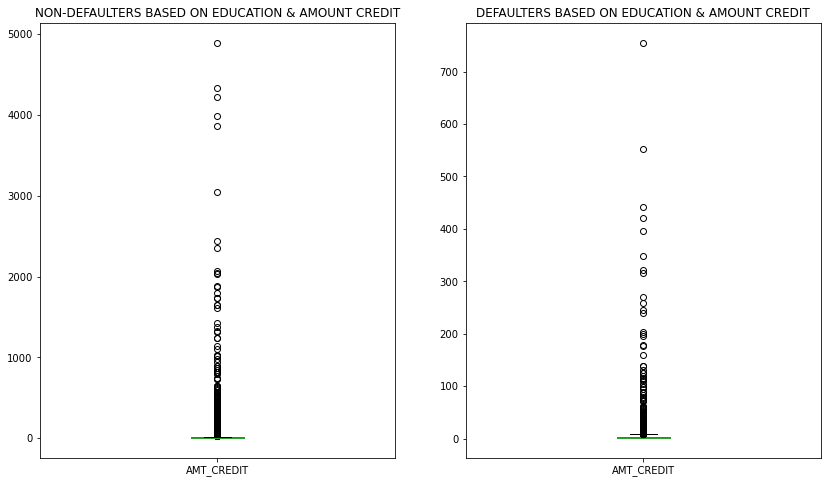

In [234]:
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
t0.groupby(["NAME_EDUCATION_TYPE"])["AMT_CREDIT"].value_counts().plot.box(title="NON-DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT")
plt.subplot(1,2,2)
t1.groupby(["NAME_EDUCATION_TYPE"])["AMT_CREDIT"].value_counts().plot.box(title="DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT")
plt.show()

#### COMPARISON OF DEFAULTERS & NON-DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT

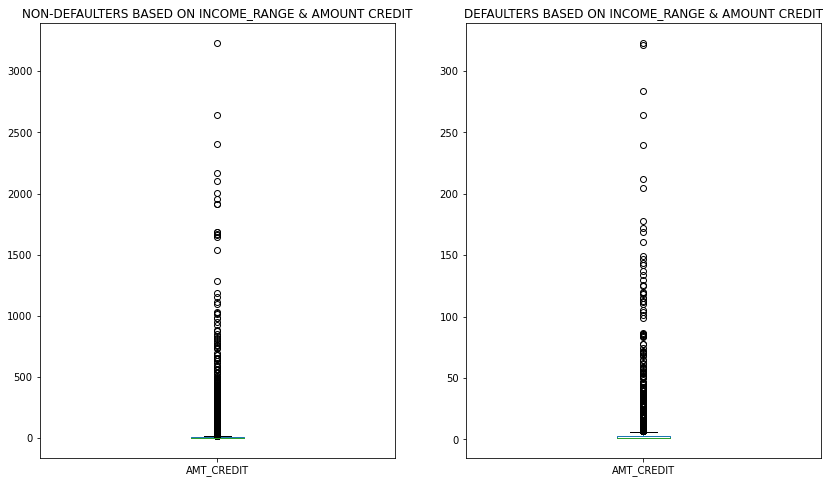

In [235]:
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
t0.groupby(["INCOME_RANGE"])["AMT_CREDIT"].value_counts().plot.box(title="NON-DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT")
plt.subplot(1,2,2)
t1.groupby(["INCOME_RANGE"])["AMT_CREDIT"].value_counts().plot.box(title="DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT")
plt.show()

### CREATING PIVOT TABLES BY COMBINING DATA

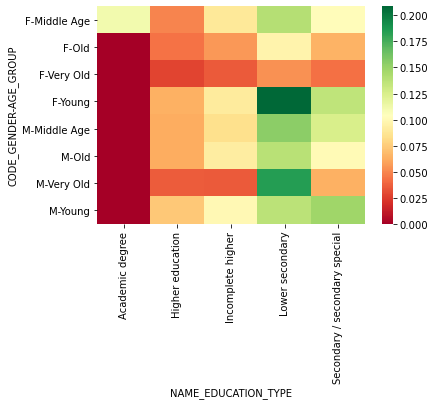

In [307]:
pt1 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','AGE_GROUP'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pt1, cmap="RdYlGn")
plt.show()

#### People who have completed Academic degree are generally less likely to default irrespective of the GENDER & AGE GROUP.

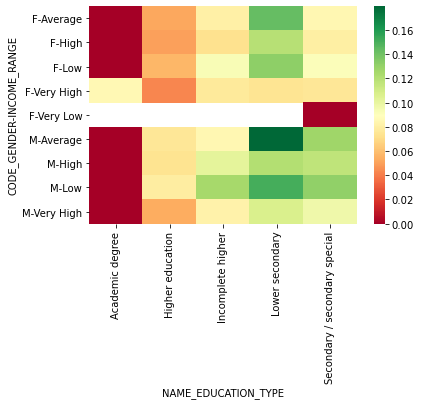

In [308]:
pt2 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pt2, cmap="RdYlGn")
plt.show()

#### People who have completed Academic degree are generally less likely to default irrespective of the GENDER & INCOME RANGE.

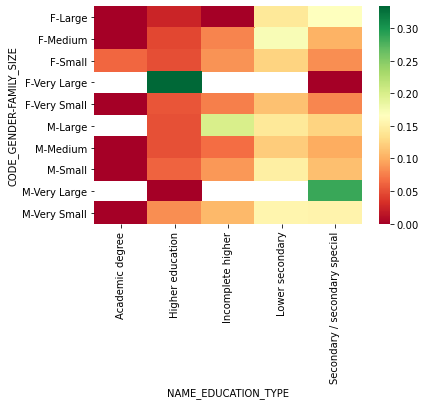

In [309]:
pt3 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','FAMILY_SIZE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pt3, cmap="RdYlGn")
plt.show()

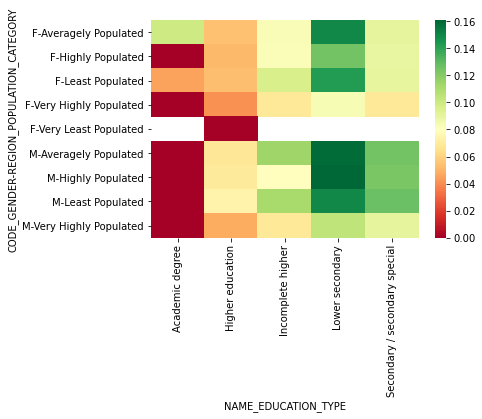

In [310]:
pt4 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','REGION_POPULATION_CATEGORY'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pt4, cmap="RdYlGn")
plt.show()

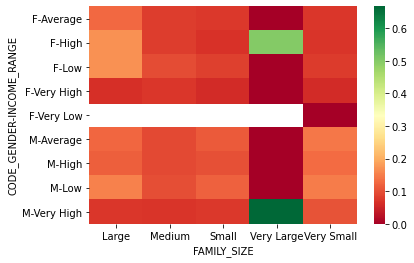

In [311]:
pt5 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['FAMILY_SIZE'], aggfunc=np.mean)
sns.heatmap(pt5, cmap="RdYlGn")
plt.show()

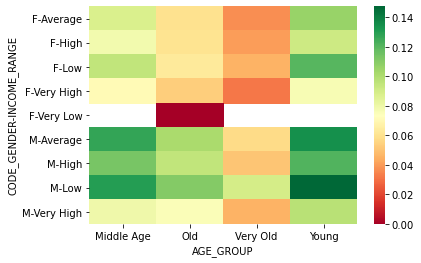

In [312]:
pt6 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['AGE_GROUP'], aggfunc=np.mean)
sns.heatmap(pt6, cmap="RdYlGn")
plt.show()

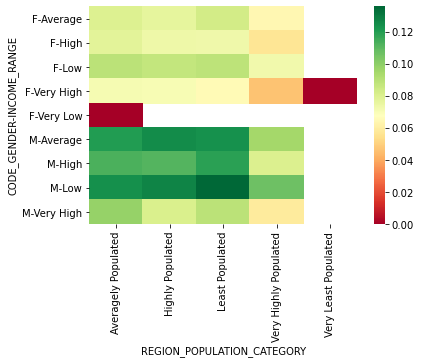

In [313]:
pt7 = pd.pivot_table(app_data2, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['REGION_POPULATION_CATEGORY'], aggfunc=np.mean)
sns.heatmap(pt7, cmap="RdYlGn")
plt.show()

## PREVIOUS APPLICATION DATA

### Checking the shape of the Previous Application Data

In [243]:
prev_app.shape

(1670214, 37)

### Checking the Statistical Inference from the Previous Application Data

In [244]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Checking the info of the Previous Application Data

In [245]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Checking the Data Types in the Previous Application Data

In [246]:
prev_app.dtypes.head(20)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
dtype: object

### Checking the "NULL" values in the Previous Application Data

In [247]:
prev_app.isnull().sum().head(20)

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
dtype: int64

### Checking the "NULL" percentage in the Previous Application Data

In [248]:
prev_app_null = (prev_app.isnull().sum())/(len(prev_app)) * 100
prev_app_null.sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
dtype: float64

### Checking the number of columns having "NULL" values more than 45% in the Previous Application Data

In [249]:
prev_app_null_count = prev_app_null[prev_app_null>45].count()
prev_app_null_count

5

### Dropping the columns from the Previous Application Data with "NULL" values more than 45%

In [250]:
# Copying the dataframe:
prev_app1 = prev_app.copy()

# Dropping the Columns:
drop_col = (prev_app1.isnull().sum())/len(prev_app1)
drop_col = list(drop_col[drop_col.values>=0.45].index)
prev_app1.drop(labels = drop_col,axis =1,inplace=True)

### Checking the shape of the new Dataframe:

In [251]:
prev_app1.shape

(1670214, 32)

### Checking the columns having "NULL" percentage greater than ZERO in the new Dataframe:

In [252]:
null_percent = (prev_app1.isna().sum())/len(prev_app1) * 100
null_percent[null_percent>0].sort_values(ascending=False)

DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

#### Replacing the NULL values with the most repeated value

In [253]:
my_list = []
for item in prev_app1.columns:
    if prev_app1[item].isna().sum()>0 :
        my_list.append(item)

for i in my_list:
    prev_app1[i] = prev_app1[i].fillna(prev_app1[i].mode()[0])

#### Checking if all the NULL values are replaced

In [254]:
prev_app1.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMI

#### Replacing 'XAP' and 'XAN' with 'NAN'

In [255]:
my_list = []
for item in prev_app1.columns:
    if prev_app1[item].isin(["XAP","XNA"]).sum()>0:
        my_list.append(item)

for i in my_list:
    prev_app1[i] = prev_app1[i].replace(["XAP","XNA"], np.NaN)

#### Checking if all the "XAP" & "XAN" values are replaced

In [256]:
prev_app1.isin(["XAP","XNA"]).sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMI

### Checking the new Dataframe

In [257]:
prev_app1.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,NaN,Approved,-73,Cash through the bank,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,NaN,Approved,-164,NaN,NaN,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


#### Converting DAYS into absolute values

In [258]:
my_list = []
for item in prev_app1.columns:
    if item[:4]=="DAYS":
        my_list.append(item)

for i in my_list:
    prev_app1[i] = prev_app1[i].abs()

#### Checking for the 'NaN' values

In [259]:
null_percent = (prev_app1.isna().sum())/len(prev_app1) * 100
null_percent[null_percent>0].sort_values(ascending=False)

NAME_CASH_LOAN_PURPOSE    95.830774
CODE_REJECT_REASON        81.327123
NAME_PRODUCT_TYPE         63.684414
NAME_GOODS_CATEGORY       56.927376
NAME_SELLER_INDUSTRY      51.234153
NAME_PAYMENT_TYPE         37.563091
NAME_YIELD_GROUP          30.966990
NAME_PORTFOLIO            22.286366
NAME_CLIENT_TYPE           0.116213
NAME_CONTRACT_TYPE         0.020716
dtype: float64

#### Dropping the columns with NaN values more than 35%

In [260]:
# Copying the dataframe:
prev_app2 = prev_app1.copy()

# Dropping the Columns:
drop_col = (prev_app2.isnull().sum())/len(prev_app2)
drop_col = list(drop_col[drop_col.values>=0.35].index)
prev_app2.drop(labels = drop_col,axis =1,inplace=True)

#### Checking the shape of the new dataframe

In [261]:
prev_app2.shape

(1670214, 26)

#### Checking the NaN percentage

In [262]:
null_percent = (prev_app2.isna().sum())/len(prev_app2) * 100
null_percent[null_percent>0].sort_values(ascending=False)

NAME_YIELD_GROUP      30.966990
NAME_PORTFOLIO        22.286366
NAME_CLIENT_TYPE       0.116213
NAME_CONTRACT_TYPE     0.020716
dtype: float64

#### Replacing the NaN values with the most repeated value

In [263]:
my_list = []
for item in prev_app2.columns:
    if prev_app2[item].isna().sum()>0 :
        my_list.append(item)

for i in my_list:
    prev_app2[i] = prev_app2[i].fillna(prev_app2[i].mode()[0])

#### Checking if all the NaN values are replaced

In [264]:
prev_app2.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_CLIENT_TYPE               0
NAME_PORTFOLIO                 0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMINATION               0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int64

#### CHECKING THE NEW DATAFRAME

In [265]:
prev_app2.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,73,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,164,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0


### UNIVARIATE ANALYSIS

#### DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE

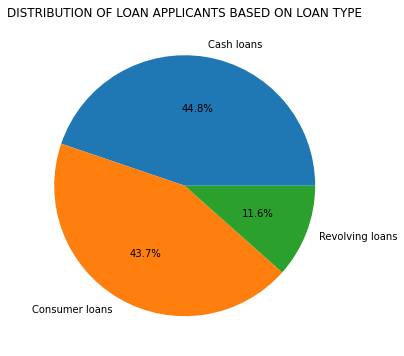

In [267]:
plt.figure(figsize=[12,6])
prev_app2.NAME_CONTRACT_TYPE.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

#### STATUS OF PREVIOUS APPLICATION

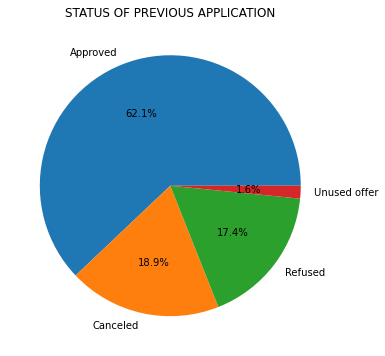

In [268]:
plt.figure(figsize=[12,6])
prev_app2.NAME_CONTRACT_STATUS.value_counts().plot.pie(title="STATUS OF PREVIOUS APPLICATION",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

#### TYPES OF CLIENTS

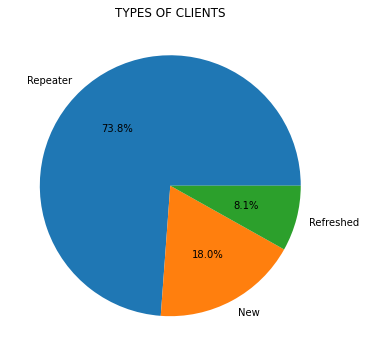

In [269]:
plt.figure(figsize=[12,6])
prev_app2.NAME_CLIENT_TYPE.value_counts().plot.pie(title="TYPES OF CLIENTS",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

#### PURPOSE OF LOAN

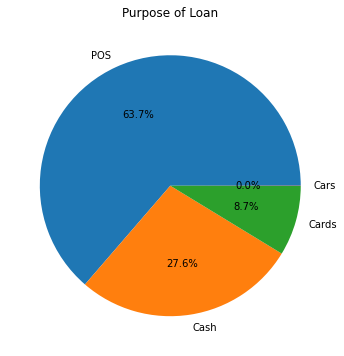

In [283]:
plt.figure(figsize=[12,6])
prev_app2.NAME_PORTFOLIO.value_counts().plot.pie(title="Purpose of Loan",
                                                 ylabel='', autopct='%1.1f%%')
plt.show()

### MULTI-VARIATE ANALYSIS

#### COMBINING PREVIOUS APPLICATION DATA & APPLICATION DATA

In [287]:
app_data_new = pd.concat([app_data2, prev_app2], axis=1, join='inner')
app_data_new.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_RANGE,REGION_POPULATION_CATEGORY,FAMILY_SIZE,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,637,Laborers,2,2,Business Entity Type 3,1134.0,Young,High,Averagely Populated,Very Small,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,73,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1188,Core staff,1,1,School,828.0,Old,Very High,Least Populated,Small,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,164,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0


#### SPLITTING THE DATA INTO TWO DATAFRAMES BASED ON "TARGET"

In [289]:
t0 = app_data_new.loc[app_data_new.TARGET==0]
t1 = app_data_new.loc[app_data_new.TARGET==1]

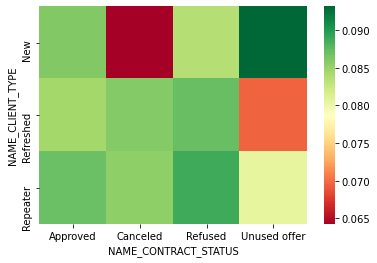

In [306]:
gt1 = pd.pivot_table(app_data_new, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(gt1, cmap="RdYlGn")
plt.show()

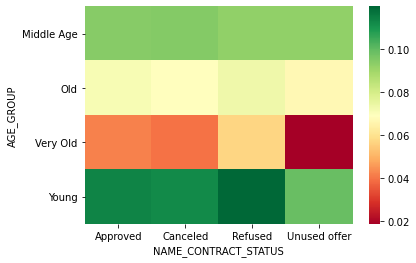

In [316]:
gt2 = pd.pivot_table(app_data_new, values='TARGET', index=['AGE_GROUP'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(gt2, cmap="RdYlGn")
plt.show()

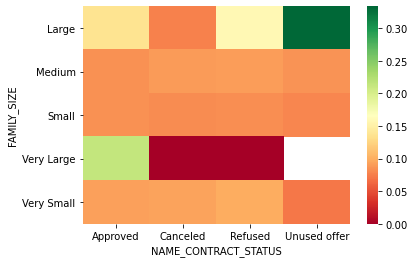

In [317]:
gt3 = pd.pivot_table(app_data_new, values='TARGET', index=['FAMILY_SIZE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(gt3, cmap="RdYlGn")
plt.show()